# Exercise 4: Epidemiology

###Task 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from scipy.stats import uniform
import torch.nn.functional as F


1.1

<div style="color: green; font-weight:
bold">
<ul>
<li>Solution here is more easier to follow than the sample solution.</li>
<li>Sample solution is more efficent because it uses preallocated arrays instead of appending to the list at each step. Also, sample solution is more modular.</li>
</ul>
</div>

In [2]:
def simulate_sir_simple(lam, mu, I_0, T=100, N=1000):
    """
    Simulates the SIR model using the Euler forward scheme.

    Parameters:
        lam (float): Infection rate (lambda)
        mu (float): Recovery rate (mu)
        I_0 (int): Initial number of infected individuals
        T (int): Number of days to simulate
        N (int): Total population size (default=1000)

    Returns:
        X (list of tuples): Sequence of daily observations [(delta S(t), delta R(t))]
        C (list of tuples): Sequence of ODE variables [(S(t), I(t), R(t))]
    """
    S = N - I_0  # Initial susceptible population
    I = I_0      # Initial infected population
    R = 0        # Initial recovered population

    X = []  # Observations (delta S, delta R)
    C = []  # ODE variables (S, I, R)

    # Simulation loop
    for t in range(T):
        # Save current state
        C.append((S, I, R))

        delta_S = -lam * (S * I) / N
        delta_I = lam * (S * I) / N - mu * I
        delta_R = mu * I


        S_new = S + delta_S
        I_new = I + delta_I
        R_new = R + delta_R

        # Store observations (absolute value of changes for convention)
        X.append((abs(S_new - S), abs(R_new - R)))

        S, I, R = S_new, I_new, R_new

    # Append final state to ODE variables
    C.append((S, I, R))

    return X, C

In [3]:
# Test
lam = 0.3  # Infection rate
mu = 0.1   # Recovery rate
I_0 = 10   # Initial infected population
T = 50     # Number of days

X, C = simulate_sir_simple(lam, mu, I_0, T)

print("Observations (Delta S, Delta R):", X[:5])
print("ODE Variables (S, I, R):", C[:5])


Observations (Delta S, Delta R): [(2.9700000000000273, 1.0), (3.544424729999946, 1.197), (4.224294209090658, 1.431742473), (5.026541241931795, 1.7109976466090693), (5.969775366809472, 2.0425520061413414)]
ODE Variables (S, I, R): [(990, 10, 0), (987.03, 11.97, 1.0), (983.48557527, 14.31742473, 2.197), (979.2612810609094, 17.109976466090693, 3.628742473), (974.2347398189776, 20.42552006141342, 5.339740119609069)]


1.2

<div style="color: green; font-weight:
bold">
<ul>
<li>Sample solution implements the OOP practices for this task, which is better.</li>
<li>The visualisation in the sample solution also much more detailed and easy to understand.</li>
</ul>
</div>

In [5]:
def visualize_sir(T, lam_range, mu_range, I0_range, N=1000):
    """
    Parameters:
        T (int): Number of days to simulate
        lam_range (tuple): Range of infection rates (min, max)
        mu_range (tuple): Range of recovery rates (min, max)
        I0_range (tuple): Range of initial infected values (min, max)
        N (int): Total population size (default=1000)

    Returns:
        None
    """
    lam_values = np.linspace(*lam_range, num=5)
    mu_values = np.linspace(*mu_range, num=5)
    I0_values = np.linspace(*I0_range, num=3, dtype=int)

    plt.figure(figsize=(10, 6))
    for lam in lam_values:
        for mu in mu_values:
            for I_0 in I0_values:
                # Simulate the model
                _, C = simulate_sir_simple(lam, mu, I_0, T, N)

                # Extract results for plotting
                S_vals = [s for s, _, _ in C]
                I_vals = [i for _, i, _ in C]
                R_vals = [r for _, _, r in C]

                # Plot infected curve for visualization
                plt.plot(range(T + 1), I_vals, label=f"λ={lam:.2f}, μ={mu:.2f}, I₀={I_0}")

    plt.xlabel("Days", fontsize=14)
    plt.ylabel("Number of Infected Individuals", fontsize=14)
    plt.title("SIR Model Dynamics for Diverse Parameters", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()

<ipython-input-5-b5e54ea787fa>:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


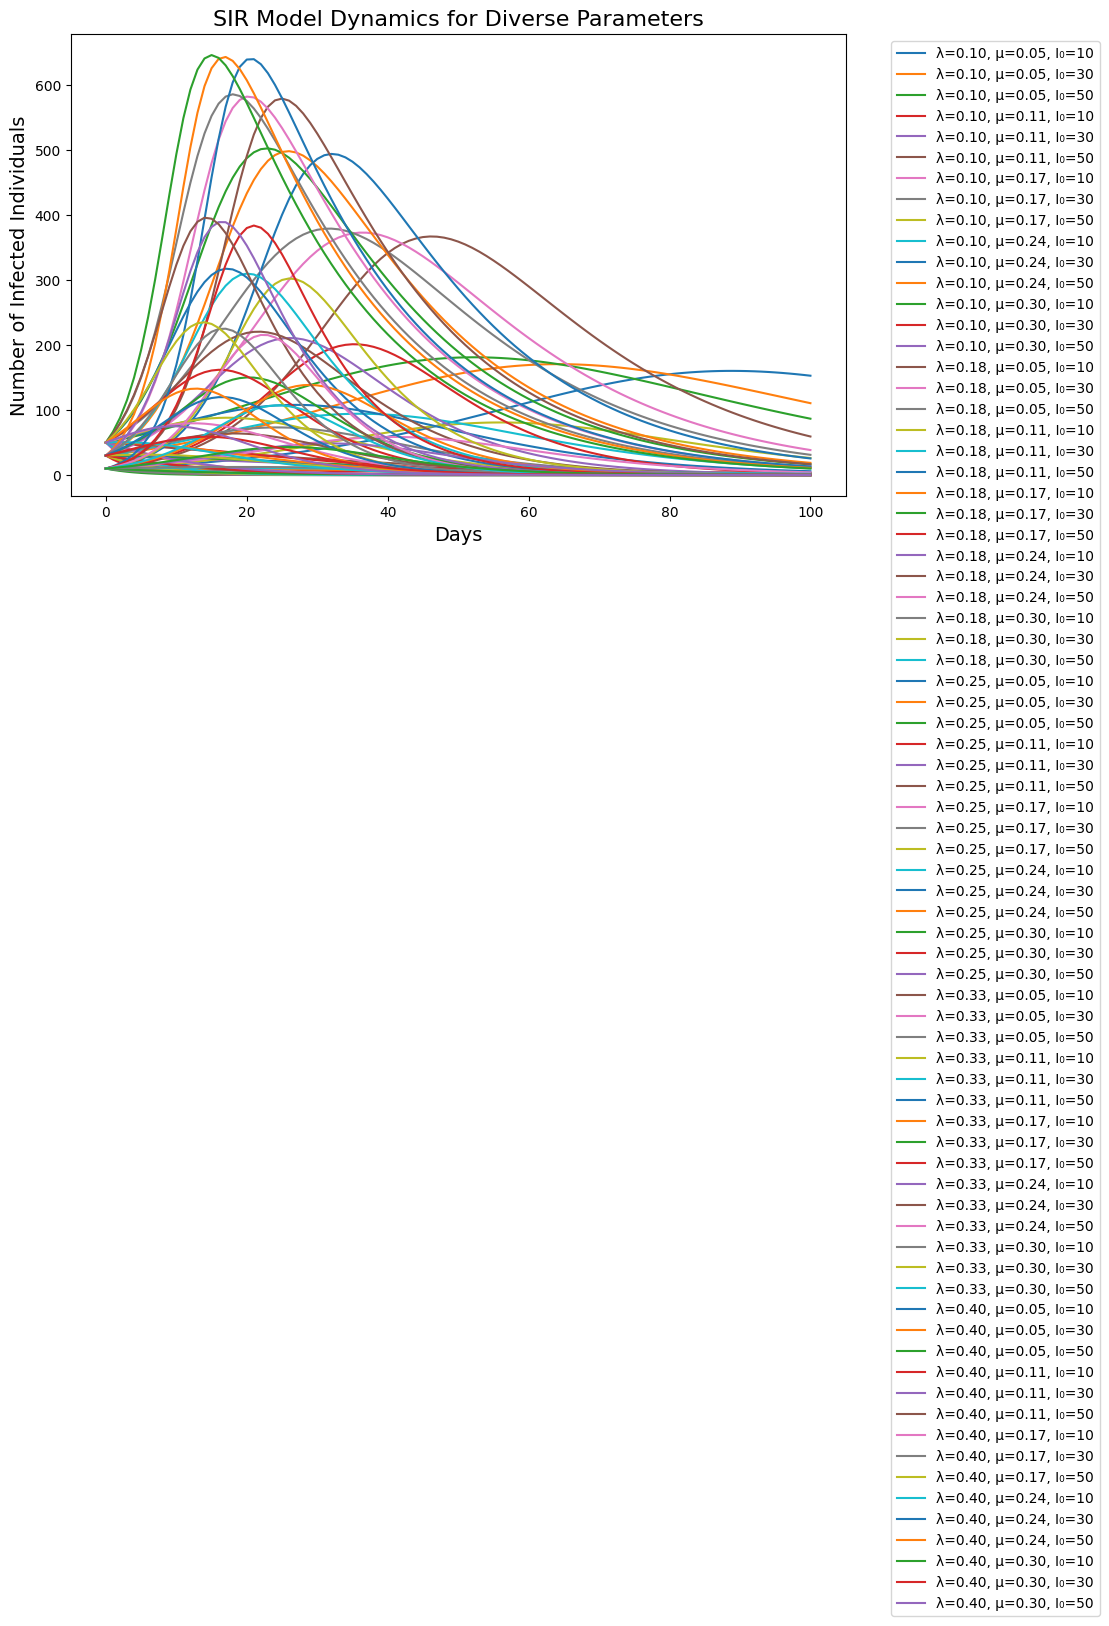

In [6]:
T = 100  # Number of days
lam_range = (0.1, 0.4)  # Infection rate range
mu_range = (0.05, 0.3)  # Recovery rate range
I0_range = (10, 50)     # Initial infected range

visualize_sir(T, lam_range, mu_range, I0_range)

1.3

<div style="color: green; font-weight:
bold">
<ul>
<li>Sample solution implements CNN, while here feed-forward NN is implemented. Hence, the differences a major enough to make absolute comparisons</li>
<li>We can not find any potential bugs in the code. I seems to be well written.</li>
<li>The visualization of predicted sample distribution was expected which is not provided.</li>
</ul>
</div>

In [7]:
# Extension of SIR model for 1.3
def simulate_sir_simple(lam, mu, I_0, T, N=1000):
    """
    Simulates the SIR model using the Euler forward scheme.

    Parameters:
        lam (float): Infection rate (lambda)
        mu (float): Recovery rate (mu)
        I_0 (int): Initial number of infected individuals
        T (int): Number of days to simulate
        N (int): Total population size (default=1000)

    Returns:
        X (list of tuples): Sequence of daily observations [(delta S(t), delta R(t))]
        C (list of tuples): Sequence of ODE variables [(S(t), I(t), R(t))]
    """
    S = N - I_0  # Initial susceptible population
    I = I_0      # Initial infected population
    R = 0        # Initial recovered population

    X = []  # Observations (delta S, delta R)
    C = []  # ODE variables (S, I, R)

    for t in range(T):
        C.append((S, I, R))

        delta_S = -lam * (S * I) / N
        delta_I = lam * (S * I) / N - mu * I
        delta_R = mu * I

        S_new = S + delta_S
        I_new = I + delta_I
        R_new = R + delta_R

        X.append((abs(S_new - S), abs(R_new - R)))

        S, I, R = S_new, I_new, R_new

    C.append((S, I, R))

    return X, C

# Dataset class
class SIRDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X, Y = self.data[idx]
        X = torch.tensor(X, dtype=torch.float32)
        Y = torch.tensor(Y, dtype=torch.float32)
        return X, Y

# Neural network model
class SIRPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SIRPredictor, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Training function
def train_model(model, train_loader, test_loader, epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X, Y in train_loader:
            optimizer.zero_grad()
            Y_pred = model(X)
            loss = criterion(Y_pred, Y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for X, Y in test_loader:
                Y_pred = model(X)
                test_loss += criterion(Y_pred, Y).item()

        test_losses.append(test_loss / len(test_loader))

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

    return train_losses, test_losses

# Generate synthetic data
def generate_data(num_samples, T, lam_range, mu_range, I0_range, N=1000):
    data = []
    for _ in range(num_samples):
        lam = np.random.uniform(*lam_range)
        mu = np.random.uniform(*mu_range)
        I_0 = np.random.randint(*I0_range)
        X, _ = simulate_sir_simple(lam, mu, I_0, T, N)
        data.append((X, [lam, mu, I_0]))
    return data


Training model with hidden_dim=32, num_samples=1000...
Epoch 1/20, Train Loss: 258.5834, Test Loss: 150.3686
Epoch 2/20, Train Loss: 117.1192, Test Loss: 115.9628
Epoch 3/20, Train Loss: 102.5797, Test Loss: 91.2177
Epoch 4/20, Train Loss: 88.9476, Test Loss: 83.4843
Epoch 5/20, Train Loss: 78.1089, Test Loss: 76.0079
Epoch 6/20, Train Loss: 69.1956, Test Loss: 69.2475
Epoch 7/20, Train Loss: 60.2246, Test Loss: 63.3507
Epoch 8/20, Train Loss: 52.9429, Test Loss: 57.5610
Epoch 9/20, Train Loss: 46.3995, Test Loss: 51.8532
Epoch 10/20, Train Loss: 40.7349, Test Loss: 46.3460
Epoch 11/20, Train Loss: 34.8045, Test Loss: 40.2755
Epoch 12/20, Train Loss: 30.8496, Test Loss: 33.5347
Epoch 13/20, Train Loss: 25.2690, Test Loss: 25.8319
Epoch 14/20, Train Loss: 20.8984, Test Loss: 20.9542
Epoch 15/20, Train Loss: 17.4385, Test Loss: 17.0147
Epoch 16/20, Train Loss: 15.2034, Test Loss: 14.3688
Epoch 17/20, Train Loss: 13.6680, Test Loss: 12.1653
Epoch 18/20, Train Loss: 12.5778, Test Loss: 10

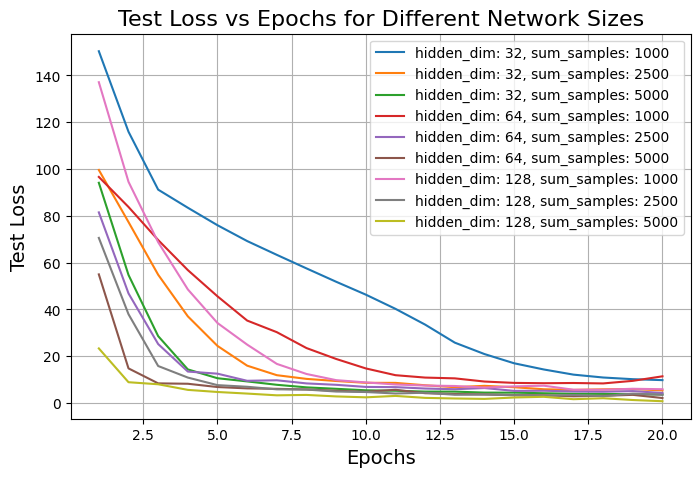

In [8]:
#Experiment and visualization
T = 100  # Number of days
input_dim = T * 2  # delta S and delta R for each day
output_dim = 3  # λ, μ, I₀

# Parameter ranges
lam_range = (0.1, 0.5)
mu_range = (0.05, 0.3)
I0_range = (10, 50)

# Experiment with different network sizes
hidden_dims = [32, 64, 128]
num_samples = [1000, 2500, 5000]

# Training configurations
batch_size = 64
epochs = 20
learning_rate = 0.001

plt.figure(figsize=(8, 5))

for hidden_dim in hidden_dims:
  for num in num_samples:
   # Generate data
   data = generate_data(num, T, lam_range, mu_range, I0_range)
   train_data = SIRDataset(data[:int(0.8 * len(data))])
   test_data = SIRDataset(data[int(0.8 * len(data)):])

   train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
   test_loader = DataLoader(test_data, batch_size=batch_size)
   model = SIRPredictor(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
   print(f"\nTraining model with hidden_dim={hidden_dim}, num_samples={num}...")
   train_losses, test_losses = train_model(model, train_loader, test_loader, epochs, learning_rate)

   # Plot test loss
   plt.plot(range(1, epochs + 1), test_losses, label=f"hidden_dim: {hidden_dim}, sum_samples: {num}")

plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Test Loss", fontsize=14)
plt.title("Test Loss vs Epochs for Different Network Sizes", fontsize=16)
plt.legend()
plt.grid()
plt.show()

It seems the loss decreases faster with increasing sample size. The hidden_dim also plays a role, but e.g. 128 with 1000 samples performs worse than 32 with 5000 samples.

1.4

<div style="color: green; font-weight:
bold">
<ul>
<li>Again, it is hard to draw comparison from sample solution as the NN in practice is very different from the one provided in sample solution.</li>
<li>However, the solution is well coded and structured, ensuring encapsulation and modularity.</li>
<li>The visualization of results is also quite fine.</li>
</ul>
</div>

In [9]:
# copy-pasted from 1.3
def simulate_sir_simple(lam, mu, I_0, T, N=1000):
    """
    Simulates the SIR model using the Euler forward scheme.

    Parameters:
        lam (float): Infection rate (lambda)
        mu (float): Recovery rate (mu)
        I_0 (int): Initial number of infected individuals
        T (int): Number of days to simulate
        N (int): Total population size (default=1000)

    Returns:
        X (list of tuples): Sequence of daily observations [(delta S(t), delta R(t))]
        C (list of tuples): Sequence of ODE variables [(S(t), I(t), R(t))]
    """
    S = N - I_0  # Initial susceptible population
    I = I_0      # Initial infected population
    R = 0        # Initial recovered population

    X = []  # Observations (delta S, delta R)
    C = []  # ODE variables (S, I, R)

    for t in range(T):
        C.append((S, I, R))

        delta_S = -lam * (S * I) / N
        delta_I = lam * (S * I) / N - mu * I
        delta_R = mu * I

        S_new = S + delta_S
        I_new = I + delta_I
        R_new = R + delta_R

        X.append((abs(S_new - S), abs(R_new - R)))

        S, I, R = S_new, I_new, R_new

    C.append((S, I, R))

    return X, C

# Dataset class
class SIRDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X, Y = self.data[idx]
        X = torch.tensor(X, dtype=torch.float32)
        Y = torch.tensor(Y, dtype=torch.float32)
        return X, Y


In [10]:
# NLL Loss for normalizing flow
def nll_loss(flow, z, log_det_jacobian):
    log_prob = -0.5 * (z ** 2).sum(dim=1)  # Assume standard Gaussian prior
    return -torch.mean(log_prob + log_det_jacobian)

In [11]:
#new version
# Neural Network Model without last layer
class SIRPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SIRPredictor, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )

    def forward(self, x):
        features = self.fc(x)
        return features

class CouplingLayer(nn.Module):
    def __init__(self, input_size, hidden_size, condition_size):
        super(CouplingLayer, self).__init__()

        # d_tilde is size of what will be transformed
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.condition_size = condition_size
        self.d_tilde = input_size // 2

        self.scale_network = nn.Sequential(
            nn.Linear(self.d_tilde + self.condition_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.d_tilde),
        )

        self.translation_network = nn.Sequential(
            nn.Linear(self.d_tilde + self.condition_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.d_tilde),
        )

    def forward(self, x, y):
        if x.shape[1] < 2:
          raise ValueError("Input x has too few features for coupling layer.")
        self.d_tilde = min(self.d_tilde, x.shape[1] // 2)
        x1 = x[:, :self.d_tilde]
        x2 = x[:, self.d_tilde:]

        z1 = x1
        #print(f"CouplingLayer.forward: x.shape={x.shape}, y.shape={y.shape}")

        # Check dimensions
        assert x1.shape[1] == self.d_tilde, f"x1 has wrong shape: {x1.shape}"
        assert y.shape[1] == self.condition_size, f"y has wrong shape: {y.shape}"

        x1_y = torch.cat([x1, y], dim=1)  # Ensure concatenation is valid
        assert x1_y.shape[1] == self.d_tilde + self.condition_size, f"x1_y has wrong shape: {x1_y.shape}"
        #print(f"x.shape: {x.shape}, x1.shape: {x1.shape}, x2.shape: {x2.shape}, y.shape: {y.shape}, x1_y.shape: {x1_y.shape}")


        s = self.scale_network(x1_y)
        t = self.translation_network(x1_y)
        z2 = torch.exp(torch.tanh(s)) * x2 + t

        z = torch.cat([z1, z2], dim=1)

        log_det_jacobian = torch.sum(torch.tanh(s), dim=1)

        return z, log_det_jacobian

    def inverse(self, z, y):
        z1 = z[:, :self.d_tilde]
        z2 = z[:, self.d_tilde:]

        x1 = z1

        x1_y = torch.cat([z1, y], dim=1)
        s = self.scale_network(x1_y)
        t = self.translation_network(x1_y)

        x2 = (z2 - t) * torch.exp(-1 * torch.tanh(s))

        x = torch.cat([x1, x2], dim=1)

        return x

class ConditionalRealNVP(nn.Module):
    def __init__(self, input_size, hidden_size, blocks, condition_size):
        super(ConditionalRealNVP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.blocks = blocks
        self.condition_size = condition_size

        self.layers = nn.ModuleList([CouplingLayer(self.input_size, self.hidden_size, self.condition_size)
                                     for _ in range(self.blocks)])

        self.orthonormal_matrices = []
        self.orthonormal_matrices_T = []
        for i in range(self.blocks-1):
            matrix = self._get_orthonormal_matrix(self.input_size)
            self.orthonormal_matrices.append(matrix)
            self.orthonormal_matrices_T.append(torch.transpose(matrix, 0, 1))

    def _get_orthonormal_matrix(self, size):
        Q, _ = torch.linalg.qr(torch.randn(size, size))
        return nn.Parameter(Q, requires_grad=False)

    def encoder(self, x, y_conditions):
        log_det_jacobian_sum = 0
        for i in range(self.blocks):
            #print(f"x.shape: {x.shape}, y_conditions.shape: {y_conditions.shape}")

            x, log_det_jacobian = self.layers[i](x, y_conditions)
            log_det_jacobian_sum += log_det_jacobian
            if i < self.blocks - 1:
                x = torch.matmul(x, self.orthonormal_matrices[i])
        return x, log_det_jacobian_sum

    def decoder(self, z, y_conditions):
        for i in range(self.blocks - 1, -1, -1):
            if i < self.blocks - 1:
                z = torch.matmul(z, self.orthonormal_matrices_T[i])
            z = self.layers[i].inverse(z, y_conditions)
        return z

    def forward(self, x, y_conditions):
        z, log_det_jacobian_sum = self.encoder(x, y_conditions)
        return z, log_det_jacobian_sum

    def sample(self, num_samples, y_conditions):
        y_conditions = torch.from_numpy(y_conditions).float()
        outputs = []
        for y_condition in y_conditions:
            z = torch.randn(num_samples, self.input_size)
            y_repeated = y_condition.repeat(num_samples, 1)
            samples = self.decoder(z, y_repeated)
            outputs.append(samples)
        outputs = torch.cat(outputs, dim=0)
        return outputs

In [12]:
def train_jointly(summary_net, realnvp, train_loader, test_loader, epochs, batch_size= 64,lr=0.001, num_samples=1000):

    optimizer = torch.optim.Adam(list(summary_net.parameters()) + list(realnvp.parameters()), lr=lr)

    for epoch in range(epochs):
        summary_net.train()
        realnvp.train()
        train_losses = []
        test_losses = []

        for X, Y in train_loader:
            optimizer.zero_grad()
            features = summary_net(X)
            #print(f"Features shape: {features.shape}")
            #print(Y.shape[-1])

            z, log_det_jacobian = realnvp(Y, features)
            #print(f"z shape: {z.shape}, log_det_jacobian shape: {log_det_jacobian.shape}")
            loss = nll_loss(realnvp, z, log_det_jacobian)
            loss.backward()
            optimizer.step()
            train_losses.append(loss / len(train_loader))

        summary_net.eval()
        realnvp.eval()
        with torch.no_grad():
            for X, Y in test_loader:
              features = summary_net(X)
              z, log_det_jacobian = realnvp(Y, features)
              loss = nll_loss(realnvp, z, log_det_jacobian)
              test_losses.append(loss / len(test_loader))

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")


In [13]:
T = 100
num_samples = 5000
batch_size = 64
epochs = 20
lr = 0.001
input_dim = T * 2
hidden_dim = 64
output_dim = 3
num_coupling_layers = 4

# Generate data
data = generate_data(num_samples, T, (0.1, 0.5), (0.05, 0.3), (10, 50))
train_data = SIRDataset(data[:int(0.8 * len(data))])
test_data = SIRDataset(data[int(0.8 * len(data)):])
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

summary_net = SIRPredictor(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
flow_model = ConditionalRealNVP(input_size=output_dim, hidden_size=hidden_dim, blocks=num_coupling_layers, condition_size=hidden_dim)

train_jointly(summary_net, flow_model, train_loader, test_loader, epochs=20, lr=lr)


Epoch 1/20, Train Loss: 0.0663, Test Loss: 0.2758
Epoch 2/20, Train Loss: 0.0591, Test Loss: 0.2311
Epoch 3/20, Train Loss: 0.0473, Test Loss: 0.1983
Epoch 4/20, Train Loss: 0.0450, Test Loss: 0.1904
Epoch 5/20, Train Loss: 0.0453, Test Loss: 0.1911
Epoch 6/20, Train Loss: 0.0408, Test Loss: 0.1754
Epoch 7/20, Train Loss: 0.0465, Test Loss: 0.1633
Epoch 8/20, Train Loss: 0.0412, Test Loss: 0.1587
Epoch 9/20, Train Loss: 0.0421, Test Loss: 0.1604
Epoch 10/20, Train Loss: 0.0364, Test Loss: 0.1583
Epoch 11/20, Train Loss: 0.0377, Test Loss: 0.1738
Epoch 12/20, Train Loss: 0.0309, Test Loss: 0.1413
Epoch 13/20, Train Loss: 0.0357, Test Loss: 0.1793
Epoch 14/20, Train Loss: 0.0304, Test Loss: 0.1405
Epoch 15/20, Train Loss: 0.0280, Test Loss: 0.1348
Epoch 16/20, Train Loss: 0.0409, Test Loss: 0.2091
Epoch 17/20, Train Loss: 0.0360, Test Loss: 0.1242
Epoch 18/20, Train Loss: 0.0386, Test Loss: 0.1673
Epoch 19/20, Train Loss: 0.0252, Test Loss: 0.1321
Epoch 20/20, Train Loss: 0.0262, Test Lo

In [14]:
def generate_and_visualize_posteriors(summary_net, realnvp, test_loader, num_samples=1000, bins=20):
    summary_net.eval()
    realnvp.eval()

    with torch.no_grad():
        for X_batch, Y_batch in test_loader:
            features = summary_net(X_batch)  # Shape: [batch_size, feature_size]

            y_samples = realnvp.sample(num_samples, features.detach().numpy()).detach().numpy()

            y_base = np.array([Y_batch[0]])
            X_base_transformed = features[0].unsqueeze(0).numpy()  # Transforming only the first instance for visualization

            fig, axs = plt.subplots(1, 3, figsize=(12, 4))
            feature_names = ['lam', 'mu', 'I_0']
            for i in range(3):
                axs[i].hist(y_samples[:, i], bins=bins)
                axs[i].set_title(f"Feature {feature_names[i]}")
                axs[i].axvline(y_base[0, i], color='red')
            fig.suptitle("Posterior Distributions")
            plt.show()
            break

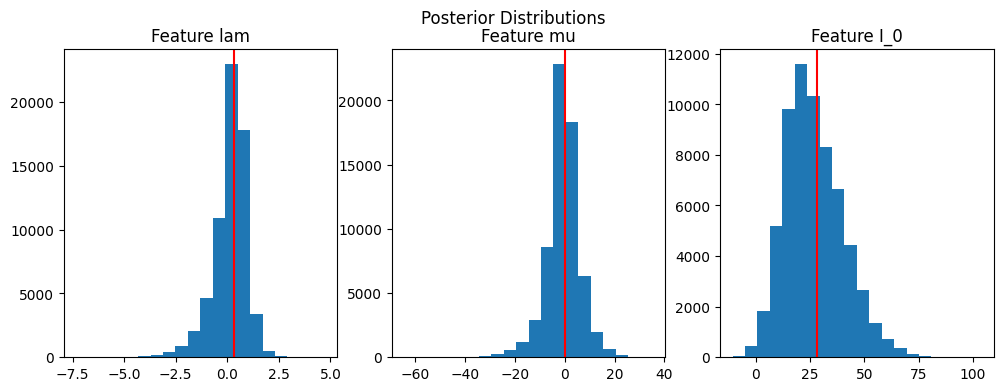

In [15]:
# Visualize posterior samples
generate_and_visualize_posteriors(summary_net, flow_model, test_loader)

the distributions seem to have a Gaussian shape, even though they might seem a little skewed to the side, especially I_0

1.5

<div style="color: green; font-weight:
bold">
<ul>
<li>The task is well coded with clear visualization of results.</li>
</ul>
</div>

In [16]:
from scipy.stats import norm
from matplotlib.patches import Ellipse
def evaluate_posterior_calibration(summary_net, realnvp, test_loader, num_samples=1000, bins=20):
    def empirical_cdf(samples, value):
        return np.mean(samples <= value)

    y_feature_names = ['lam', 'mu', 'I_0']
    summary_net.eval()
    realnvp.eval()

    with torch.no_grad():
        for X_batch, Y_batch in test_loader:
            X_instance = X_batch[0].unsqueeze(0)  # Use the first sample for evaluation
            Y_true = Y_batch[0].numpy()  # True parameter values

            features = summary_net(X_instance)  # Features for conditioning

            # Generate posterior samples
            y_samples = realnvp.sample(num_samples, features.detach().numpy()).detach().numpy()

            # Marginal calibration (histograms and empirical CDFs with ellipse)
            fig, axs = plt.subplots(2, 3, figsize=(15, 10))

            for j in range(3):  # Loop over the three parameters
                # Histogram
                axs[0, j].hist(y_samples[:, j], bins=bins, density=True, alpha=0.7, label="Posterior samples")
                axs[0, j].axvline(Y_true[j], color='red', linestyle='--', label="True value")
                axs[0, j].set_title(f"Histogram: {y_feature_names[j]}")
                axs[0, j].set_xlabel("Value")
                axs[0, j].set_ylabel("Density")
                axs[0, j].legend()

                # Empirical CDF
                sorted_samples = np.sort(y_samples[:, j])
                cdf_values = np.arange(1, len(sorted_samples) + 1) / len(sorted_samples)

                axs[1, j].plot(sorted_samples, cdf_values, label="Empirical CDF")
                axs[1, j].scatter([Y_true[j]], [empirical_cdf(sorted_samples, Y_true[j])],
                                  color='red', label=f"True value CDF: {empirical_cdf(sorted_samples, Y_true[j]):.2f}")

                # Residual plot (CDF deviation)
                #residual_t = np.linspace(0, 1, 100)
                cdf_empirical = np.array([empirical_cdf(sorted_samples, t) for t in sorted_samples])
                r_t = cdf_empirical - sorted_samples
                axs[1, j].plot(sorted_samples, r_t, label="Residual (r(t))", color='blue')

                # Add ellipse for confidence bounds
                axs[1, j].add_patch(Ellipse((0.5, 0), width=1, height=2, edgecolor='red', facecolor='none', linestyle='--'))
                axs[1, j].axhline(0, color='black', linestyle='--')
                axs[1, j].set_ylim([-1, 1])
                axs[1, j].set_title(f"Empirical CDF and Residual: {y_feature_names[j]}")
                axs[1, j].set_xlabel("Value")
                axs[1, j].set_ylabel("r(t) Residual")
                axs[1, j].legend()

            # Joint calibration: Energy computation and visualization
            log_prob_sum = []
            for y_sample in y_samples:
                y_sample_tensor = torch.tensor(y_sample, dtype=torch.float32).unsqueeze(0)
                log_prob, _ = realnvp(y_sample_tensor, features)
                log_prob_sum.append(-log_prob.sum().item())  # Compute energy as -log p(Y|X)

            log_prob_sum = np.array(log_prob_sum)

            fig, axs = plt.subplots(1, 2, figsize=(12, 5))

            # Histogram of energy values
            axs[0].hist(log_prob_sum, bins=bins, density=True, alpha=0.7, label="Energy values")
            axs[0].set_title("Joint Histogram: Energy Values")
            axs[0].set_xlabel("Energy")
            axs[0].set_ylabel("Density")
            axs[0].legend()

            # Empirical CDF for energy
            sorted_energy = np.sort(log_prob_sum)
            cdf_values = np.arange(1, len(sorted_energy) + 1) / len(sorted_energy)
            axs[1].plot(sorted_energy, cdf_values, label="Empirical CDF")
            axs[1].scatter([sorted_energy.mean()], [empirical_cdf(sorted_energy, sorted_energy.mean())],
                           color='red', label=f"Mean Energy CDF: {empirical_cdf(sorted_energy, sorted_energy.mean()):.2f}")
            axs[1].set_title("Empirical CDF: Energy")
            axs[1].set_xlabel("Energy")
            axs[1].set_ylabel("CDF")
            axs[1].legend()

            fig.tight_layout()
            plt.show()

            break  # Only process the first batch


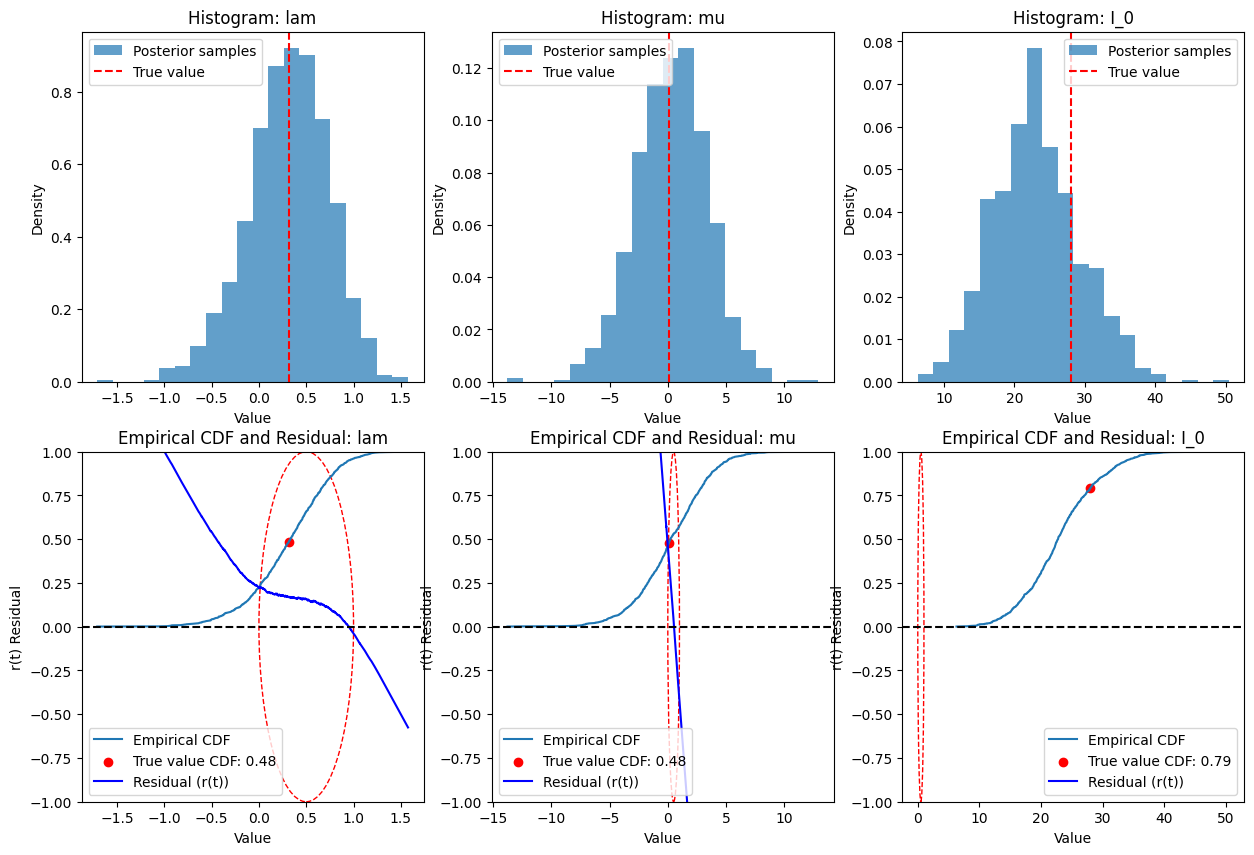

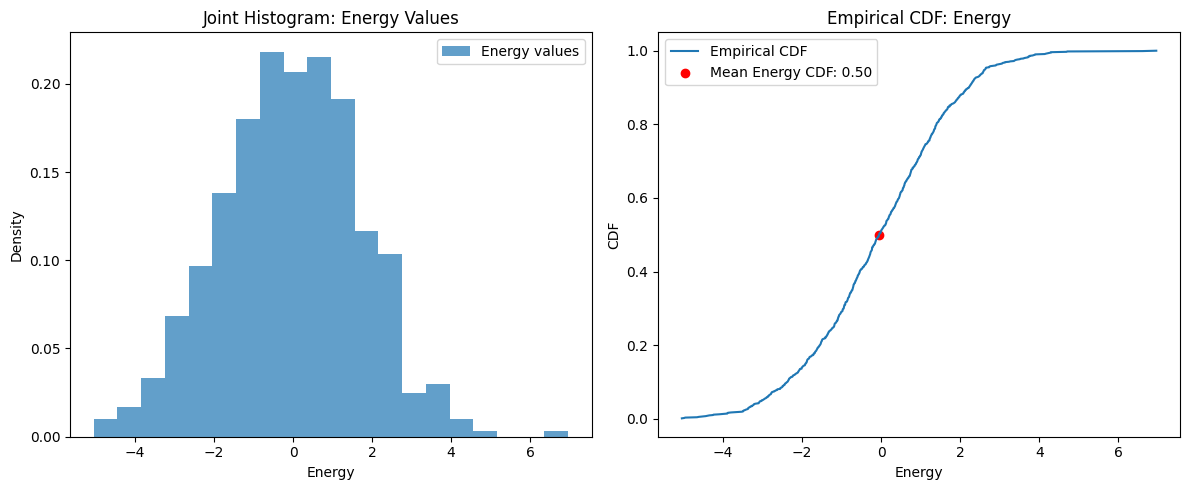

In [17]:
# Evaluate marginal and posterior calibration
evaluate_posterior_calibration(summary_net, flow_model, test_loader)

Especially for I_0, the values are way off from the elliptic confidence bounds.
As for the histograms, they have a Gaussian shape around the true value which is mostly also where the middle peak of the histogram is (except for I_0 again).

1.6

In [20]:
def post_predictive_calibration(summary_net, realnvp, test_loader, M=100, num_of_plots=3, T=100):
    with torch.no_grad():
        for i, (X_batch, y_batch) in enumerate(test_loader):
            if i >= num_of_plots:
                break

            #y_batch = torch.from_numpy(y_batch).float()
            #X_batch = torch.from_numpy(X_batch).float()

            X_transformed = summary_net(X_batch)
            row = X_transformed[0].unsqueeze(0).numpy()  # Process only the first sample for demonstration

            y_samples = realnvp.sample(M, row).numpy()
            C_sim = [
                simulate_sir_simple(y_samples[j][0], y_samples[j][1], y_samples[j][2], T)[1]
                for j in range(M)
            ]


            C_sim = np.array(C_sim)
            # Pad or reshape to ensure consistent dimensions for all samples
            max_len = max(c.shape[0] for c in C_sim)
            C_sim_padded = []

            for c in C_sim:
                pad_len = max_len - c.shape[0]
                if pad_len > 0:
                    c_padded = np.pad(c, ((0, pad_len), (0, 0)), mode='constant', constant_values=np.nan)
                    C_sim_padded.append(c_padded)
                else:
                    C_sim_padded.append(c)

            C_sim = np.array(C_sim_padded)

            # Plot with matplotlib
            fig, ax = plt.subplots(1, 3, figsize=(15, 5))
            for j in range(M):
                ax[0].plot(np.arange(T+1), C_sim[j, :, 0], 'gray', alpha=0.5)
                ax[1].plot(np.arange(T+1), C_sim[j, :, 1], 'gray', alpha=0.5)
                ax[2].plot(np.arange(T+1), C_sim[j, :, 2], 'gray', alpha=0.5)

            # Plot real values in red for each compartment
            C_real = simulate_sir_simple(y_batch[0][0], y_batch[0][1], y_batch[0][2], T)[1]
            C_real = np.array(C_real)  # Ensure it's a 2D array

            for j, label in enumerate(['S', 'I', 'R']):
                ax[j].plot(np.arange(T+1), C_real[:, j], 'o-', color="red", label=f"Real {label}")
                ax[j].set_title(f"Simulation of {'SIR'[j]}, real value: {y_batch[0][j]:.3f}")
                ax[j].set_ylim([0, 1])
                ax[j].legend()

            fig.suptitle(f"Simulation vs resimulation parameter {i}")
            plt.show()

<ipython-input-9-d19d758ea3e1>:27: RuntimeWarning: overflow encountered in scalar multiply
  delta_S = -lam * (S * I) / N
<ipython-input-9-d19d758ea3e1>:28: RuntimeWarning: overflow encountered in scalar multiply
  delta_I = lam * (S * I) / N - mu * I
<ipython-input-9-d19d758ea3e1>:35: RuntimeWarning: invalid value encountered in scalar subtract
  X.append((abs(S_new - S), abs(R_new - R)))
<ipython-input-9-d19d758ea3e1>:28: RuntimeWarning: invalid value encountered in scalar subtract
  delta_I = lam * (S * I) / N - mu * I


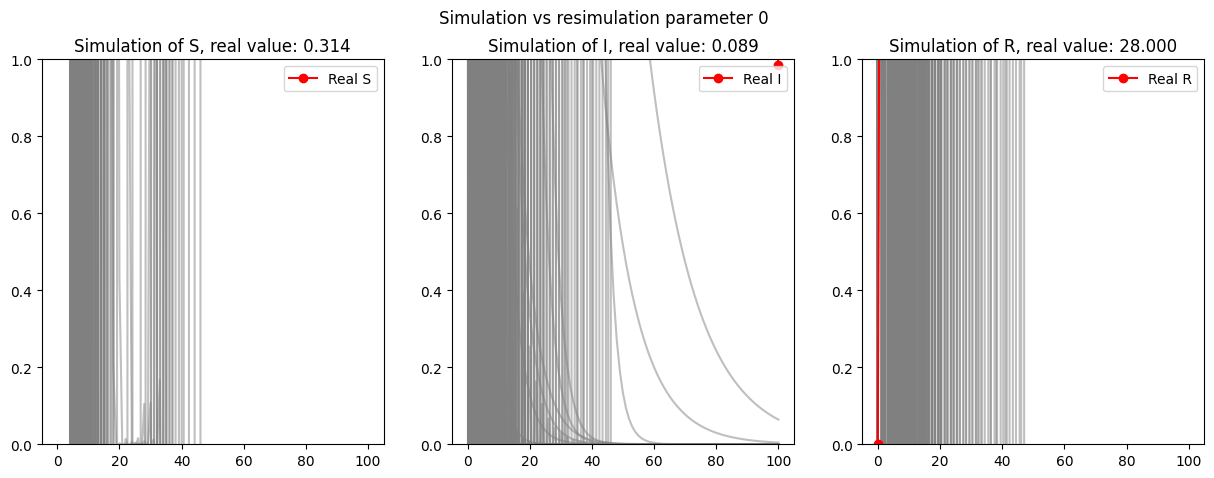

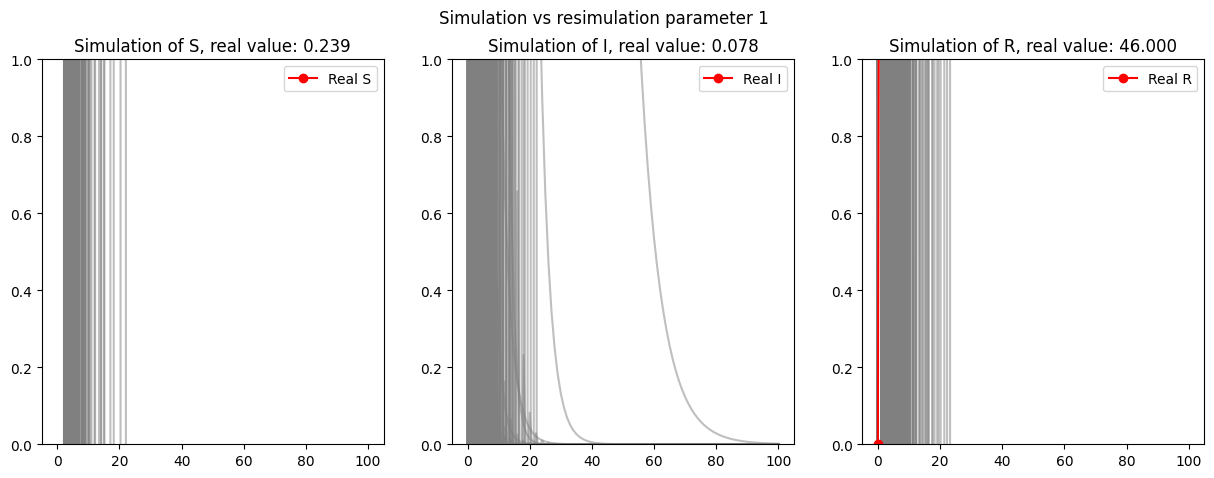

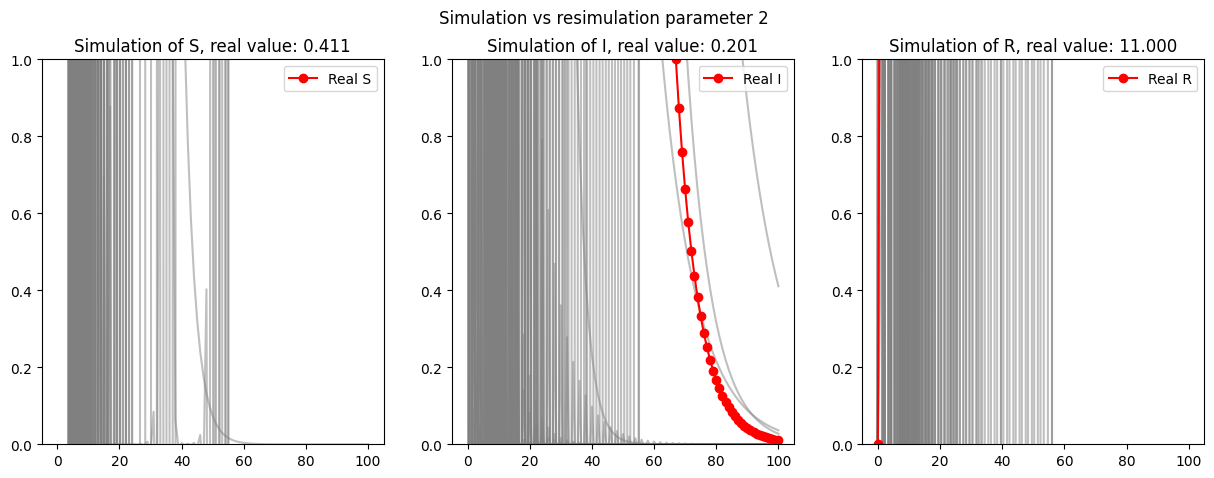

In [21]:
# check confidence intervals
post_predictive_calibration(summary_net, flow_model, test_loader)

The real values don't seem to be within the confidence intervals, meaning the model didn't calibrate correctly.

###Task 2

<div style="color: green; font-weight:
bold">
<ul>
<li>All the blocks of code are in continuation of code from task 1. Hence, as there are only the required updates, no significant objection is observed.</li>
<li>No significant bug is found.</li>
<li>The visualisation is almost the same as in task 1, with required updates. Hence, the missing/improvments in the visualisation are same as mentioned in task 1. Apart from the missing visualisations(as commented in task 1), the rest is very well represented</li>
<li>Overall, the task is well executed.</li>
</ul>
</div>

In [22]:
def simulate_sir_noisy(lam, mu, I_0, L, rho, sigma_2, T, N=1000):
    """
    Simulates the SIR model with multiplicative Gaussian noise, including noise on infections.

    Parameters:
        lam (float): Infection rate (lambda)
        mu (float): Recovery rate (mu)
        I_0 (int): Initial number of infected individuals
        L (int): Reporting delay (L >= 0)
        rho (float): Underreporting fraction (0 <= rho <= 1)
        sigma_2 (float): Reporting error variance
        T (int): Number of days to simulate
        N (int): Total population size (default=1000)

    Returns:
        X (list of tuples): Sequence of noise-free daily observations [(delta S(t), delta R(t))]
        X_hat (list of tuples): Sequence of noisy daily observations [(delta S_hat(t), delta R_hat(t))]
        I_hat (list): Sequence of noisy infected individuals I_hat(t)
    """
    # Noise-free simulation
    X, C = simulate_sir_simple(lam, mu, I_0, T, N)

    X_hat = []
    I_hat = []

    for t in range(T):
        delta_S, delta_R = X[t]
        S, I, R = C[t]

        # Reporting delay and underreporting
        if t >= L:
            delta_S_reported = rho * X[t - L][0]
            delta_R_reported = rho * X[t - L][1]
        else:
            delta_S_reported, delta_R_reported = 0, 0

        delta_S_noisy = np.random.normal(delta_S_reported, np.sqrt(sigma_2) * abs(delta_S_reported))
        delta_R_noisy = np.random.normal(delta_R_reported, np.sqrt(sigma_2) * abs(delta_R_reported))
        I_noisy = np.random.normal(I, np.sqrt(sigma_2) * abs(I))

        # Ensure non-negativity
        delta_S_noisy = max(delta_S_noisy, 0)
        delta_R_noisy = max(delta_R_noisy, 0)
        I_noisy = max(I_noisy, 0)

        X_hat.append((delta_S_noisy, delta_R_noisy))
        I_hat.append(I_noisy)

    return X, X_hat, I_hat


In [23]:
def visualize_noisy_vs_clean(X, X_hat, C, I_hat):
    """
    Visualizes the difference between noise-free and noisy observations,
    including infected individuals.

    Parameters:
        X (list of tuples): Noise-free observations [(delta S(t), delta R(t))]
        X_hat (list of tuples): Noisy observations [(delta S_hat(t), delta R_hat(t))]
        C (list of tuples): Noise-free SIR variables [(S(t), I(t), R(t))]
        I_hat (list): Noisy infected individuals I_hat(t)
    """
    T = len(X)
    delta_S_clean, delta_R_clean = zip(*X)
    delta_S_noisy, delta_R_noisy = zip(*X_hat)
    _, I_clean, _ = zip(*C)

    plt.figure(figsize=(12, 4))

    # Delta S comparison
    plt.subplot(1, 3, 1)
    plt.plot(range(T), delta_S_clean, label="Clean $\Delta S$", marker="o", linestyle="-")
    plt.plot(range(T), delta_S_noisy, label="Noisy $\Delta S$", marker="x", linestyle="--")
    plt.xlabel("Day")
    plt.ylabel("Changes in Susceptibles")
    plt.title("Noise-Free vs Noisy $\Delta S$")
    plt.legend()

    # Delta R comparison
    plt.subplot(1, 3, 2)
    plt.plot(range(T), delta_R_clean, label="Clean $\Delta R$", marker="o", linestyle="-")
    plt.plot(range(T), delta_R_noisy, label="Noisy $\Delta R$", marker="x", linestyle="--")
    plt.xlabel("Day")
    plt.ylabel("Changes in Recovered")
    plt.title("Noise-Free vs Noisy $\Delta R$")
    plt.legend()

    # Infected comparison
    plt.subplot(1, 3, 3)
    plt.plot(range(T), I_clean, label="Clean $I$", marker="o", linestyle="-")
    plt.plot(range(T), I_hat, label="Noisy $I$", marker="x", linestyle="--")
    plt.xlabel("Day")
    plt.ylabel("Number of Infected Individuals")
    plt.title("Noise-Free vs Noisy $I$")
    plt.legend()

    plt.tight_layout()
    plt.show()

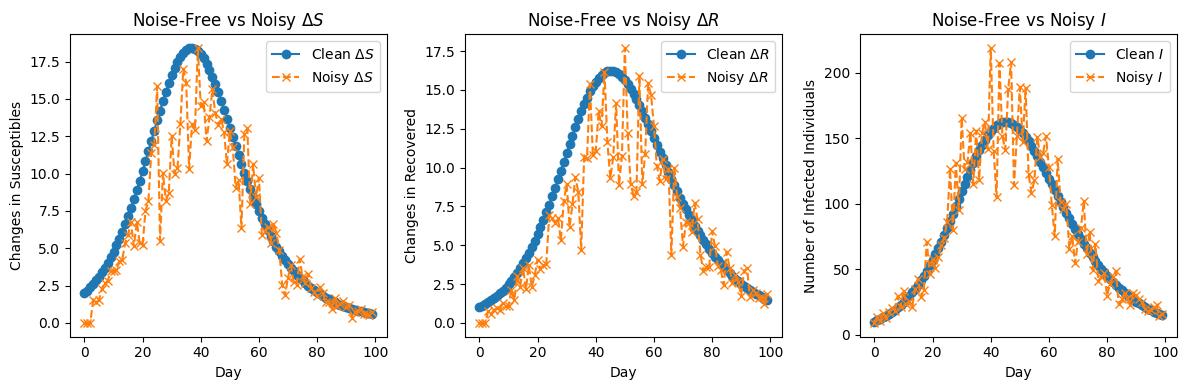

In [24]:
# Visualize noisy vs. clean data
lam, mu, I_0, L, rho, sigma_2, T = 0.2, 0.1, 10, 3, 0.8, 0.05, 100
_, C = simulate_sir_simple(lam, mu, I_0, T)
C = C[:T]
X, X_hat, I_hat = simulate_sir_noisy(lam, mu, I_0, L, rho, sigma_2, T)
visualize_noisy_vs_clean(X, X_hat, C, I_hat)

In [25]:
class SIRDatasetExtended(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X, Y = self.data[idx]
        X = torch.tensor(X, dtype=torch.float32)
        Y = torch.tensor(Y, dtype=torch.float32)

        # Extract individual parameters if they're part of Y
        params = Y  # Assuming Y contains [lam, mu, I0, L, rho, sigma2]
        return X, Y, params  # Explicitly return X, Y, and params

def generate_noisy_data(num_samples, T, lam_range, mu_range, I0_range,
                        L_range, rho_range, sigma2_range, N=1000):
    """
    Generates a dataset with noisy observations for the SIR model.

    Parameters:
        num_samples (int): Number of samples to generate.
        T (int): Number of timesteps to simulate.
        lam_range (tuple): Range for infection rate lambda (e.g., (0.1, 0.3)).
        mu_range (tuple): Range for recovery rate mu (e.g., (0.05, 0.2)).
        I0_range (tuple): Range for initial infections I_0 (e.g., (5, 20)).
        L_range (tuple): Range for reporting delay L (e.g., (0, 5)).
        rho_range (tuple): Range for underreporting fraction rho (e.g., (0.5, 1.0)).
        sigma2_range (tuple): Range for reporting error variance sigma^2 (e.g., (0.01, 0.1)).
        N (int): Total population size (default=1000).

    Returns:
        list: A list of tuples (X_hat, [lambda, mu, I_0, L, rho, sigma^2]).
    """
    data = []
    for _ in range(num_samples):
        lam = np.random.uniform(*lam_range)
        mu = np.random.uniform(*mu_range)
        I_0 = np.random.randint(*I0_range)
        L = np.random.randint(*L_range)
        rho = np.random.uniform(*rho_range)
        sigma_2 = np.random.uniform(*sigma2_range)

        # Generate noisy data
        X_hat, _, _ = simulate_sir_noisy(lam, mu, I_0, L, rho, sigma_2, T)

        # Store the noisy observations and parameters
        data.append((X_hat, [lam, mu, I_0, L, rho, sigma_2]))
    return data


In [26]:
# Extended
# Neural network model same as task 1
class SIRPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SIRPredictor, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Training function
def train_model_extended(model, train_loader, test_loader, epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X, Y, *params in train_loader:
            optimizer.zero_grad()
            Y_pred = model(X)
            loss = criterion(Y_pred, Y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for X, Y, *params in test_loader:
                Y_pred = model(X)
                test_loss += criterion(Y_pred, Y).item()

        test_losses.append(test_loss / len(test_loader))

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

    return train_losses, test_losses


Training model with hidden_dim=32, num_samples=1000...
Epoch 1/20, Train Loss: 19.9921, Test Loss: 13.6018
Epoch 2/20, Train Loss: 8.5751, Test Loss: 8.8290
Epoch 3/20, Train Loss: 6.5172, Test Loss: 8.2407
Epoch 4/20, Train Loss: 5.8580, Test Loss: 7.4881
Epoch 5/20, Train Loss: 5.2639, Test Loss: 6.9395
Epoch 6/20, Train Loss: 4.9774, Test Loss: 6.5867
Epoch 7/20, Train Loss: 4.6642, Test Loss: 6.0441
Epoch 8/20, Train Loss: 4.2739, Test Loss: 5.5698
Epoch 9/20, Train Loss: 3.9149, Test Loss: 5.0129
Epoch 10/20, Train Loss: 3.5625, Test Loss: 4.5163
Epoch 11/20, Train Loss: 3.2075, Test Loss: 4.0408
Epoch 12/20, Train Loss: 2.8518, Test Loss: 3.5895
Epoch 13/20, Train Loss: 2.4133, Test Loss: 3.0375
Epoch 14/20, Train Loss: 2.0878, Test Loss: 2.6240
Epoch 15/20, Train Loss: 1.7828, Test Loss: 2.3602
Epoch 16/20, Train Loss: 1.6394, Test Loss: 2.1575
Epoch 17/20, Train Loss: 1.4667, Test Loss: 1.9073
Epoch 18/20, Train Loss: 1.3371, Test Loss: 1.7865
Epoch 19/20, Train Loss: 1.2910, 

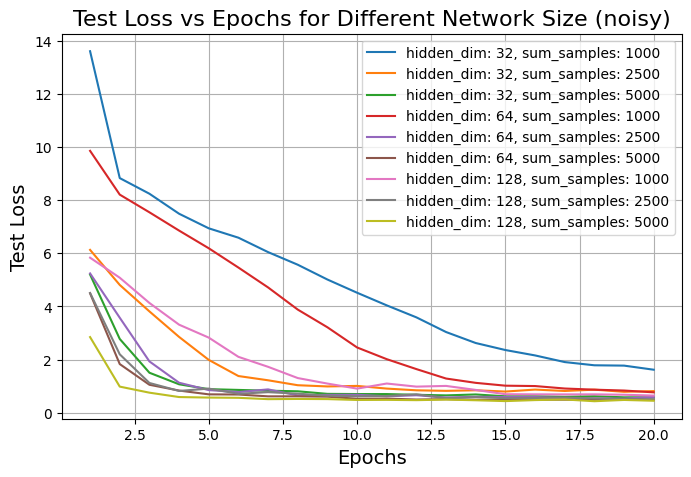

In [27]:
# Repeat experiments from task 1
T = 100
hidden_dims = [32, 64, 128]
num_samples = [1000, 2500, 5000]
input_dim = T*2
output_dim = 6

I0_range = (5, 20)
lam_range = (0.1, 0.5)
mu_range = (0.05, 0.2)
L_range = (0, 5)
rho_range = (0.5, 1.0)
sigma2_range = (0.01, 0.1)
batch_size = 64
epochs = 20
learning_rate = 0.001

plt.figure(figsize=(8, 5))

for hidden_dim in hidden_dims:
  for num in num_samples:
   # Generate data
    noisy_data = generate_noisy_data(num, T, lam_range, mu_range, I0_range,
                                 L_range, rho_range, sigma2_range)

    # Create dataset
    noisy_dataset = SIRDatasetExtended(noisy_data)
    train_data = SIRDatasetExtended(noisy_data[:int(0.8 * len(noisy_data))])
    test_data = SIRDatasetExtended(noisy_data[int(0.8 * len(noisy_data)):])
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size)

    model = SIRPredictor(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
    print(f"\nTraining model with hidden_dim={hidden_dim}, num_samples={num}...")
    train_losses, test_losses = train_model_extended(model, train_loader, test_loader, epochs, learning_rate)

    # Plot test loss
    plt.plot(range(1, epochs + 1), test_losses, label=f"hidden_dim: {hidden_dim}, sum_samples: {num}")

plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Test Loss", fontsize=14)
plt.title("Test Loss vs Epochs for Different Network Size (noisy)", fontsize=16)
plt.legend()
plt.grid()
plt.show()

similar to the clean data, the best performance is the largest hidden_size together with largest sample size. The loss decreases more with increasing hidden_size and sample size.

In [63]:
class SIRPredictor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SIRPredictor, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )

    def forward(self, x):
        features = self.fc(x)
        return features

class CouplingLayer(nn.Module):
    def __init__(self, input_size, hidden_size, condition_size):
        super(CouplingLayer, self).__init__()

        # d_tilde is size of what will be transformed
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.condition_size = condition_size
        self.d_tilde = input_size // 2

        self.scale_network = nn.Sequential(
            nn.Linear(self.d_tilde + self.condition_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.d_tilde),
        )

        self.translation_network = nn.Sequential(
            nn.Linear(self.d_tilde + self.condition_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.d_tilde),
        )

    def forward(self, x, y):
        if x.shape[1] < 2:
          raise ValueError("Input x has too few features for coupling layer.")
        self.d_tilde = min(self.d_tilde, x.shape[1] // 2)
        x1 = x[:, :self.d_tilde]
        x2 = x[:, self.d_tilde:]

        z1 = x1
        #print(f"CouplingLayer.forward: x.shape={x.shape}, y.shape={y.shape}")

        # Check dimensions
        assert x1.shape[1] == self.d_tilde, f"x1 has wrong shape: {x1.shape}"
        assert y.shape[1] == self.condition_size, f"y has wrong shape: {y.shape}"

        x1_y = torch.cat([x1, y], dim=1)  # Ensure concatenation is valid
        assert x1_y.shape[1] == self.d_tilde + self.condition_size, f"x1_y has wrong shape: {x1_y.shape}"
        #print(f"x.shape: {x.shape}, x1.shape: {x1.shape}, x2.shape: {x2.shape}, y.shape: {y.shape}, x1_y.shape: {x1_y.shape}")


        s = self.scale_network(x1_y)
        t = self.translation_network(x1_y)
        z2 = torch.exp(torch.tanh(s)) * x2 + t

        z = torch.cat([z1, z2], dim=1)

        log_det_jacobian = torch.sum(torch.tanh(s), dim=1)

        return z, log_det_jacobian

    def inverse(self, z, y):
        z1 = z[:, :self.d_tilde]
        z2 = z[:, self.d_tilde:]

        x1 = z1

        x1_y = torch.cat([z1, y], dim=1)
        s = self.scale_network(x1_y)
        t = self.translation_network(x1_y)

        x2 = (z2 - t) * torch.exp(-1 * torch.tanh(s))

        x = torch.cat([x1, x2], dim=1)

        return x

class ConditionalRealNVP(nn.Module):
    def __init__(self, input_size, hidden_size, blocks, condition_size):
        super(ConditionalRealNVP, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.blocks = blocks
        self.condition_size = condition_size

        self.layers = nn.ModuleList([CouplingLayer(self.input_size, self.hidden_size, self.condition_size)
                                     for _ in range(self.blocks)])

        self.orthonormal_matrices = []
        self.orthonormal_matrices_T = []
        for i in range(self.blocks-1):
            matrix = self._get_orthonormal_matrix(self.input_size)
            self.orthonormal_matrices.append(matrix)
            self.orthonormal_matrices_T.append(torch.transpose(matrix, 0, 1))

    def _get_orthonormal_matrix(self, size):
        Q, _ = torch.linalg.qr(torch.randn(size, size))
        return nn.Parameter(Q, requires_grad=False)

    def encoder(self, x, y_conditions):
        log_det_jacobian_sum = 0
        for i in range(self.blocks):
            #print(f"x.shape: {x.shape}, y_conditions.shape: {y_conditions.shape}")

            x, log_det_jacobian = self.layers[i](x, y_conditions)
            log_det_jacobian_sum += log_det_jacobian
            if i < self.blocks - 1:
                x = torch.matmul(x, self.orthonormal_matrices[i])
        return x, log_det_jacobian_sum

    def decoder(self, z, y_conditions):
        for i in range(self.blocks - 1, -1, -1):
            if i < self.blocks - 1:
                z = torch.matmul(z, self.orthonormal_matrices_T[i])
            z = self.layers[i].inverse(z, y_conditions)
        return z

    def forward(self, x, y_conditions):
        z, log_det_jacobian_sum = self.encoder(x, y_conditions)
        return z, log_det_jacobian_sum

    def sample(self, num_samples, y_conditions):
        y_conditions = torch.from_numpy(y_conditions).float()
        outputs = []
        for y_condition in y_conditions:
            z = torch.randn(num_samples, self.input_size)
            y_repeated = y_condition.repeat(num_samples, 1)
            samples = self.decoder(z, y_repeated)
            outputs.append(samples)
        outputs = torch.cat(outputs, dim=0)
        return outputs

In [29]:
def train_jointly_extended(summary_net, realnvp, train_loader, test_loader, epochs, lr=0.001):
    optimizer = torch.optim.Adam(list(summary_net.parameters()) + list(realnvp.parameters()), lr=lr)

    for epoch in range(epochs):
        summary_net.train()
        realnvp.train()
        train_losses = []
        test_losses = []

        for X, Y, *params in train_loader:
            optimizer.zero_grad()
            features = summary_net(X)
            #print(f"Features shape: {features.shape}")
            #print(Y.shape[-1])

            z, log_det_jacobian = realnvp(Y, features)
            #print(f"z shape: {z.shape}, log_det_jacobian shape: {log_det_jacobian.shape}")
            loss = nll_loss(realnvp, z, log_det_jacobian)
            loss.backward()
            optimizer.step()
            train_losses.append(loss / len(train_loader))

        summary_net.eval()
        realnvp.eval()
        with torch.no_grad():
            for X, Y, *params in test_loader:
              features = summary_net(X)
              z, log_det_jacobian = realnvp(Y, features)
              loss = nll_loss(realnvp, z, log_det_jacobian)
              test_losses.append(loss / len(test_loader))

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")


In [66]:
# repeat experiments from task 1
T = 100
num_samples = 5000
batch_size = 64
epochs = 20
input_dim = T * 2
hidden_dim = 64
output_dim = 6
num_coupling_layers = 4
I0_range = (5, 20)
lam_range = (0.1, 0.5)
mu_range = (0.05, 0.2)
L_range = (0, 5)
rho_range = (0.5, 1.0)
sigma2_range = (0.01, 0.1)
lr = 0.001

# Generate data
noisy_data = generate_noisy_data(num_samples, T, lam_range, mu_range, I0_range,
                                 L_range, rho_range, sigma2_range)

# Create dataset
noisy_dataset = SIRDatasetExtended(noisy_data)
train_data_noisy = SIRDatasetExtended(noisy_data[:int(0.8 * len(noisy_data))])
test_data_noisy = SIRDatasetExtended(noisy_data[int(0.8 * len(noisy_data)):])
train_loader_noisy = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader_noisy = DataLoader(test_data, batch_size=batch_size)


In [34]:
summary_net_noisy = SIRPredictor(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
flow_model_noisy = ConditionalRealNVP(input_size=6, hidden_size=hidden_dim, blocks=num_coupling_layers, condition_size=hidden_dim)

train_jointly_extended(summary_net_noisy, flow_model_noisy, train_loader_noisy, test_loader_noisy, epochs=epochs, lr=lr)

Epoch 1/20, Train Loss: 0.0084, Test Loss: 0.0130
Epoch 2/20, Train Loss: -0.0274, Test Loss: -0.0911
Epoch 3/20, Train Loss: -0.0417, Test Loss: -0.1818
Epoch 4/20, Train Loss: -0.0545, Test Loss: -0.2148
Epoch 5/20, Train Loss: -0.0708, Test Loss: -0.2675
Epoch 6/20, Train Loss: -0.0776, Test Loss: -0.2811
Epoch 7/20, Train Loss: -0.0733, Test Loss: -0.2504
Epoch 8/20, Train Loss: -0.0805, Test Loss: -0.3006
Epoch 9/20, Train Loss: -0.0734, Test Loss: -0.3181
Epoch 10/20, Train Loss: -0.0694, Test Loss: -0.3393
Epoch 11/20, Train Loss: -0.0998, Test Loss: -0.3105
Epoch 12/20, Train Loss: -0.0966, Test Loss: -0.3772
Epoch 13/20, Train Loss: -0.1044, Test Loss: -0.4056
Epoch 14/20, Train Loss: -0.0840, Test Loss: -0.4052
Epoch 15/20, Train Loss: -0.1073, Test Loss: -0.4281
Epoch 16/20, Train Loss: -0.1006, Test Loss: -0.3917
Epoch 17/20, Train Loss: -0.1105, Test Loss: -0.4082
Epoch 18/20, Train Loss: -0.1136, Test Loss: -0.4279
Epoch 19/20, Train Loss: -0.1104, Test Loss: -0.4330
Epoc

In [35]:
def generate_and_visualize_posteriors_extended(summary_net, realnvp, test_loader, num_samples=1000, bins=20):
    summary_net.eval()
    realnvp.eval()

    with torch.no_grad():
        for X_batch, Y_batch, *params in test_loader:
            features = summary_net(X_batch)  # Shape: [batch_size, feature_size]

            y_samples = realnvp.sample(num_samples, features.detach().numpy()).detach().numpy()

            y_base = np.array([Y_batch[0]])
            X_base_transformed = features[0].unsqueeze(0).numpy()  # Transforming only the first instance for visualization

            fig, axs = plt.subplots(1, 3, figsize=(12, 4))
            feature_names = ['lam', 'mu', 'I_0']
            for i in range(3):
                axs[i].hist(y_samples[:, i], bins=bins)
                axs[i].set_title(f"Feature {feature_names[i]}")
                axs[i].axvline(y_base[0, i], color='red')
            fig.suptitle("Posterior Distributions")
            plt.show()
            break

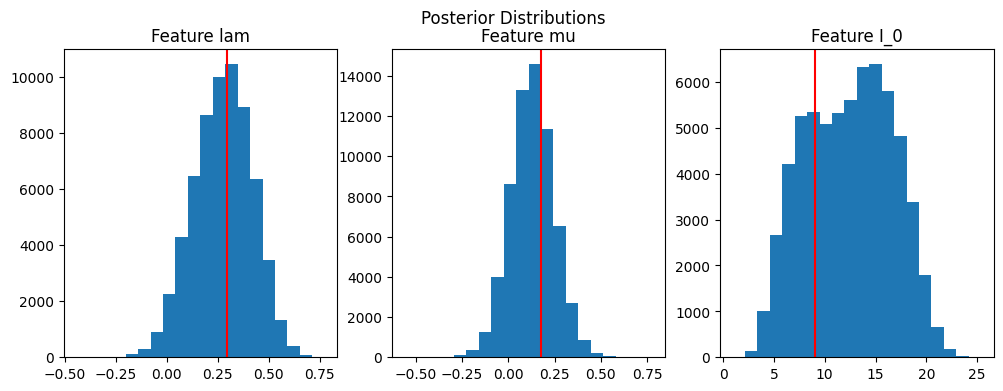

In [36]:
# Visualize posterior samples
generate_and_visualize_posteriors_extended(summary_net_noisy, flow_model_noisy, test_loader_noisy)

while the first two have some Gaussian-like shape, I_0 looks more uniform and also skewed to the right

In [37]:
def evaluate_posterior_calibration_extended(summary_net, realnvp, test_loader, num_samples=1000, bins=20):
    def empirical_cdf(samples, value):
        return np.mean(samples <= value)

    y_feature_names = ['lam', 'mu', 'I_0']
    summary_net.eval()
    realnvp.eval()

    with torch.no_grad():
        for X_batch, Y_batch, *params in test_loader:
            X_instance = X_batch[0].unsqueeze(0)  # Use the first sample for evaluation
            Y_true = Y_batch[0].numpy()  # True parameter values

            features = summary_net(X_instance)  # Features for conditioning

            # Generate posterior samples
            y_samples = realnvp.sample(num_samples, features.detach().numpy()).detach().numpy()

            # Marginal calibration (histograms and empirical CDFs with ellipse)
            fig, axs = plt.subplots(2, 3, figsize=(15, 10))

            for j in range(3):  # Loop over the three parameters
                # Histogram
                axs[0, j].hist(y_samples[:, j], bins=bins, density=True, alpha=0.7, label="Posterior samples")
                axs[0, j].axvline(Y_true[j], color='red', linestyle='--', label="True value")
                axs[0, j].set_title(f"Histogram: {y_feature_names[j]}")
                axs[0, j].set_xlabel("Value")
                axs[0, j].set_ylabel("Density")
                axs[0, j].legend()

                # Empirical CDF
                sorted_samples = np.sort(y_samples[:, j])
                cdf_values = np.arange(1, len(sorted_samples) + 1) / len(sorted_samples)

                axs[1, j].plot(sorted_samples, cdf_values, label="Empirical CDF")
                axs[1, j].scatter([Y_true[j]], [empirical_cdf(sorted_samples, Y_true[j])],
                                  color='red', label=f"True value CDF: {empirical_cdf(sorted_samples, Y_true[j]):.2f}")

                # Residual plot (CDF deviation)
                #residual_t = np.linspace(0, 1, 100)
                cdf_empirical = np.array([empirical_cdf(sorted_samples, t) for t in sorted_samples])
                r_t = cdf_empirical - sorted_samples
                axs[1, j].plot(sorted_samples, r_t, label="Residual (r(t))", color='blue')

                # Add ellipse for confidence bounds
                axs[1, j].add_patch(Ellipse((0.5, 0), width=1, height=2, edgecolor='red', facecolor='none', linestyle='--'))
                axs[1, j].axhline(0, color='black', linestyle='--')
                axs[1, j].set_ylim([-1, 1])
                axs[1, j].set_title(f"Empirical CDF and Residual: {y_feature_names[j]}")
                axs[1, j].set_xlabel("Value")
                axs[1, j].set_ylabel("r(t) Residual")
                axs[1, j].legend()

            # Joint calibration: Energy computation and visualization
            log_prob_sum = []
            for y_sample in y_samples:
                y_sample_tensor = torch.tensor(y_sample, dtype=torch.float32).unsqueeze(0)
                log_prob, _ = realnvp(y_sample_tensor, features)
                log_prob_sum.append(-log_prob.sum().item())  # Compute energy as -log p(Y|X)

            log_prob_sum = np.array(log_prob_sum)

            fig, axs = plt.subplots(1, 2, figsize=(12, 5))

            # Histogram of energy values
            axs[0].hist(log_prob_sum, bins=bins, density=True, alpha=0.7, label="Energy values")
            axs[0].set_title("Joint Histogram: Energy Values")
            axs[0].set_xlabel("Energy")
            axs[0].set_ylabel("Density")
            axs[0].legend()

            # Empirical CDF for energy
            sorted_energy = np.sort(log_prob_sum)
            cdf_values = np.arange(1, len(sorted_energy) + 1) / len(sorted_energy)
            axs[1].plot(sorted_energy, cdf_values, label="Empirical CDF")
            axs[1].scatter([sorted_energy.mean()], [empirical_cdf(sorted_energy, sorted_energy.mean())],
                           color='red', label=f"Mean Energy CDF: {empirical_cdf(sorted_energy, sorted_energy.mean()):.2f}")
            axs[1].set_title("Empirical CDF: Energy")
            axs[1].set_xlabel("Energy")
            axs[1].set_ylabel("CDF")
            axs[1].legend()

            fig.tight_layout()
            plt.show()

            break  # Only process the first batch

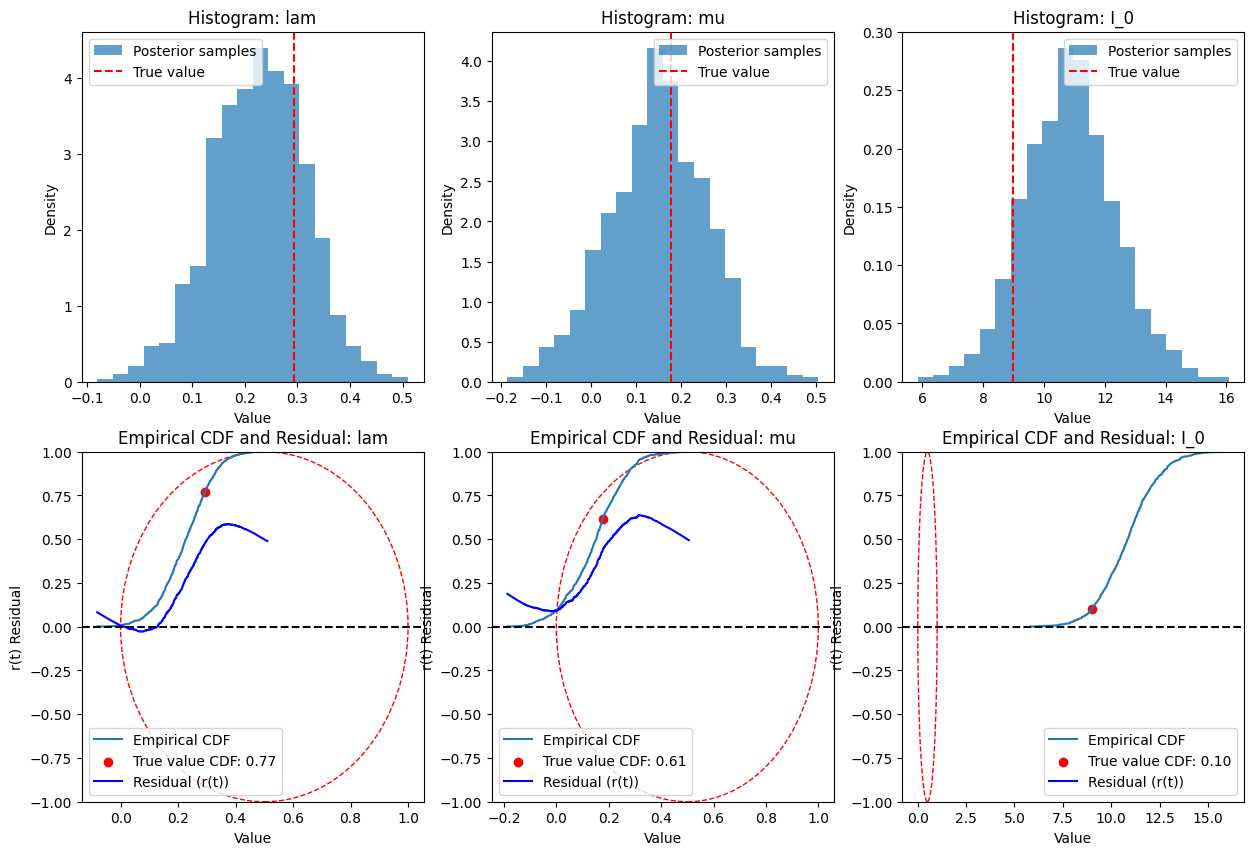

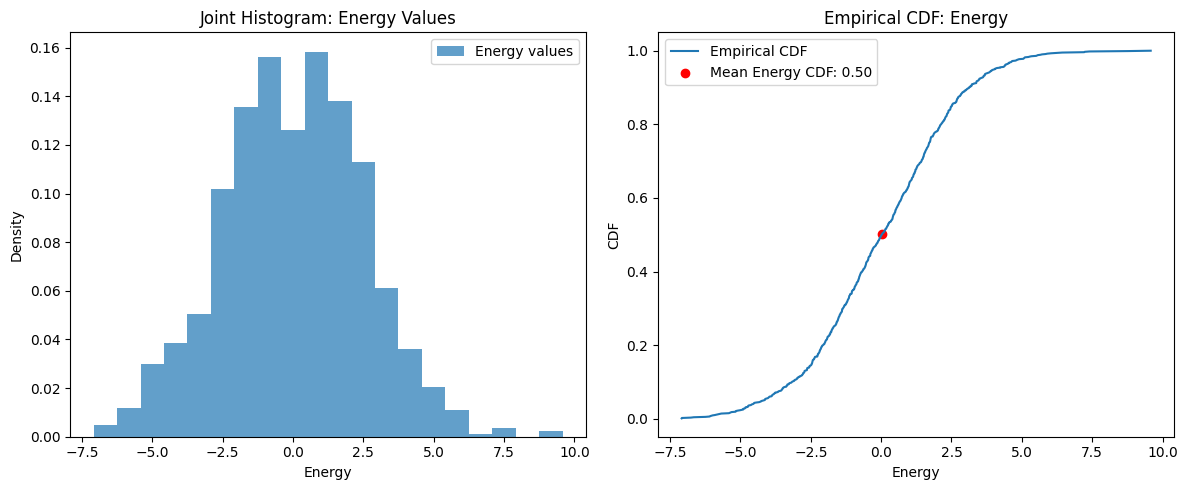

In [38]:
# Evaluate marginal and posterior calibration
evaluate_posterior_calibration_extended(summary_net_noisy, flow_model_noisy, test_loader_noisy)

for I_0, the values are again way off the confidence interval and also the histogram isn't centered around the true value as it is for the other two. The energy histogram has a similar shape than before just with two peaks, and the empirical CDF also looks similar

In [39]:
def post_predictive_calibration_extended(summary_net, realnvp, test_loader, M=100, num_of_plots=3, T=100):
    with torch.no_grad():
        for i, (X_batch, y_batch, *params) in enumerate(test_loader):
            if i >= num_of_plots:
                break

            #y_batch = torch.from_numpy(y_batch).float()
            #X_batch = torch.from_numpy(X_batch).float()

            X_transformed = summary_net(X_batch)
            row = X_transformed[0].unsqueeze(0).numpy()  # Process only the first sample for demonstration

            y_samples = realnvp.sample(M, row).numpy()
            C_sim = [
                simulate_sir_simple(y_samples[j][0], y_samples[j][1], y_samples[j][2], T)[1]
                for j in range(M)
            ]


            C_sim = np.array(C_sim)
            '''
            # Pad or reshape to ensure consistent dimensions for all samples
            max_len = max(c.shape[0] for c in C_sim)
            C_sim_padded = []

            for c in C_sim:
                pad_len = max_len - c.shape[0]
                if pad_len > 0:
                    c_padded = np.pad(c, ((0, pad_len), (0, 0)), mode='constant', constant_values=np.nan)
                    C_sim_padded.append(c_padded)
                else:
                    C_sim_padded.append(c)

            C_sim = np.array(C_sim_padded)
            '''
            # Plot with matplotlib
            fig, ax = plt.subplots(1, 3, figsize=(15, 5))
            for j in range(M):
                ax[0].plot(np.arange(T+1), C_sim[j, :, 0], 'gray', alpha=0.5)
                ax[1].plot(np.arange(T+1), C_sim[j, :, 1], 'gray', alpha=0.5)
                ax[2].plot(np.arange(T+1), C_sim[j, :, 2], 'gray', alpha=0.5)

            # Plot real values in red for each compartment
            C_real = simulate_sir_simple(y_batch[0][0], y_batch[0][1], y_batch[0][2], T)[1]
            C_real = np.array(C_real)  # Ensure it's a 2D array

            for j, label in enumerate(['S', 'I', 'R']):
                ax[j].plot(np.arange(T+1), C_real[:, j], 'o-', color="red", label=f"Real {label}")
                ax[j].set_title(f"Simulation of {'SIR'[j]}, real value: {y_batch[0][j]:.3f}")
                ax[j].set_ylim([0, 1])
                ax[j].legend()

            fig.suptitle(f"Simulation vs resimulation parameter {i}")
            plt.show()

<ipython-input-9-d19d758ea3e1>:27: RuntimeWarning: overflow encountered in scalar multiply
  delta_S = -lam * (S * I) / N
<ipython-input-9-d19d758ea3e1>:28: RuntimeWarning: overflow encountered in scalar multiply
  delta_I = lam * (S * I) / N - mu * I
<ipython-input-9-d19d758ea3e1>:35: RuntimeWarning: invalid value encountered in scalar subtract
  X.append((abs(S_new - S), abs(R_new - R)))


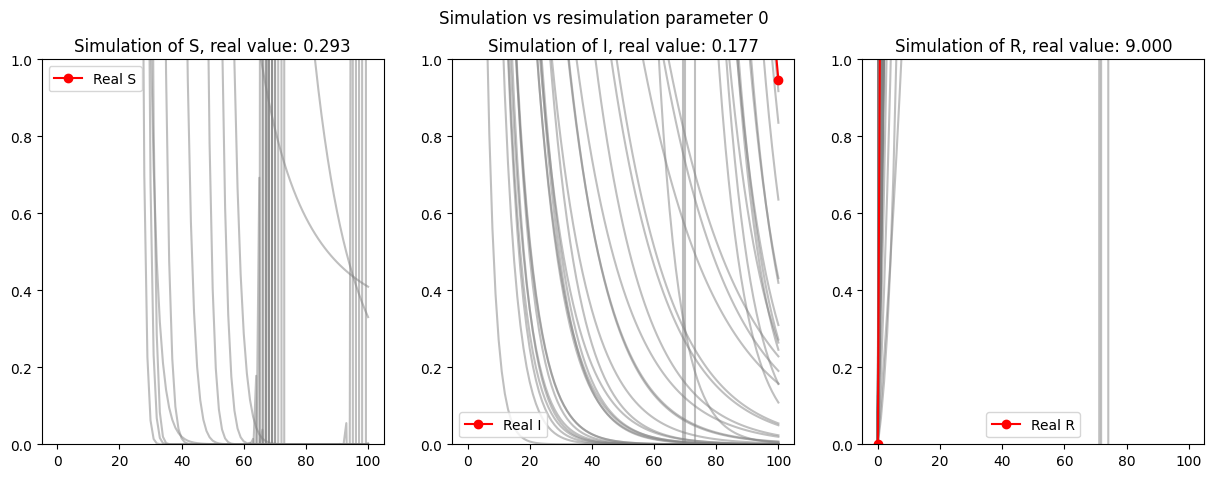

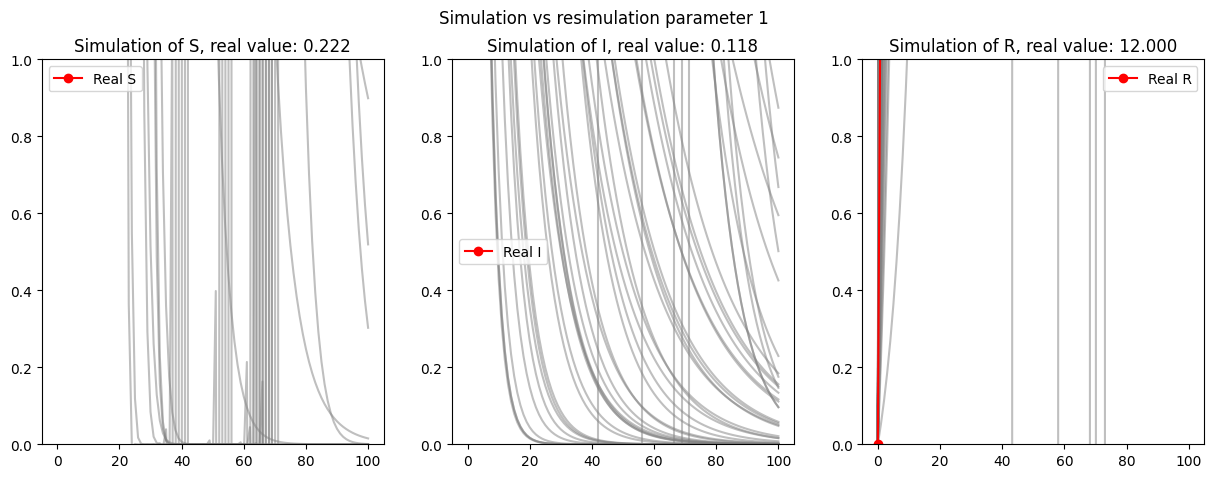

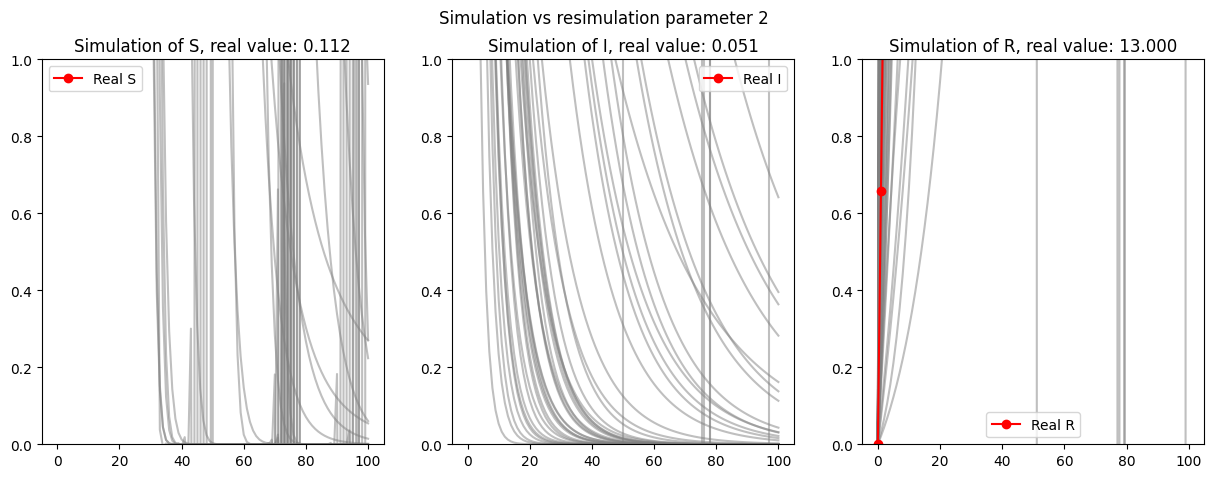

In [40]:
# check confidence intervals
post_predictive_calibration_extended(summary_net_noisy, flow_model_noisy, test_loader_noisy)

given the confidence interval, this model also didn't seem to calibrate correctly

### Task 3

<div style="color: green; font-weight:
bold">
<ul>
<li>The chi-test with hypothesis is better executed in sample solution.</li>
<li>The representation of MMD loss is better executed in sample solution.</li>
</ul>
</div>

In [41]:
# Gaussian kernel for MMD
def gaussian_kernel(x, y, bandwidth=1.0):
    x_norm = x.pow(2).sum(1, keepdim=True)
    y_norm = y.pow(2).sum(1, keepdim=True)
    xy = torch.matmul(x, y.T)
    distances = x_norm + y_norm.T - 2 * xy
    return torch.exp(-distances / (2 * bandwidth ** 2))

# MMD loss function
def mmd_loss(h_x, standard_normal_samples, bandwidth=1.0):
    k_hx_hx = gaussian_kernel(h_x, h_x, bandwidth)
    k_zz = gaussian_kernel(standard_normal_samples, standard_normal_samples, bandwidth)
    k_hx_z = gaussian_kernel(h_x, standard_normal_samples, bandwidth)
    return k_hx_hx.mean() + k_zz.mean() - 2 * k_hx_z.mean()

In [65]:
def train_with_mmd(summary_net, realnvp, train_loader, test_loader, epochs, lr=0.001, lambda_mmd=1.0, bandwidth=1.0):
    optimizer = torch.optim.Adam(list(summary_net.parameters()) + list(realnvp.parameters()), lr=lr)

    for epoch in range(epochs):
        summary_net.train()
        realnvp.train()
        train_losses = []
        test_losses = []

        for X, Y, *params in train_loader:
            optimizer.zero_grad()

            features = summary_net(X)
            z, log_det_jacobian = realnvp(Y, features)

            nll = nll_loss(realnvp, z, log_det_jacobian)

            standard_normal_samples = torch.randn_like(features)
            mmd = mmd_loss(features, standard_normal_samples, bandwidth=bandwidth)

            # Total loss
            loss = nll + lambda_mmd * mmd

            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        # Evaluation
        summary_net.eval()
        realnvp.eval()
        with torch.no_grad():
            for X, Y, *params in test_loader:
                features = summary_net(X)
                z, log_det_jacobian = realnvp(Y, features)

                nll = nll_loss(realnvp, z, log_det_jacobian)
                standard_normal_samples = torch.randn_like(features)
                mmd = mmd_loss(features, standard_normal_samples, bandwidth=bandwidth)
                test_loss = nll + lambda_mmd * mmd
                test_losses.append(test_loss.item())

        print(
            f"Epoch {epoch+1}/{epochs}, "
            f"Train Loss: {torch.tensor(train_losses).mean():.4f}, "
            f"Test Loss: {torch.tensor(test_losses).mean():.4f}, "
            f"MMD: {mmd.item():.4f}"
        )

In [43]:
import scipy.stats as stats

# Chi-squared test function
def chi2_test(features, significance_level=0.01):
    chi2_values = torch.sum(features**2, dim=1).detach().numpy()  # Chi-squared statistic for each sample
    p_values = 1 - stats.chi2.cdf(chi2_values, df=features.size(1))  # Compute p-values
    rejected = np.sum(p_values < significance_level)  # Count rejections of the null hypothesis
    return rejected, len(p_values)


In [44]:
# Generate data
T = 100
num_samples = 5000
batch_size = 64
epochs = 20
input_dim = T * 2
hidden_dim=64
num_coupling_layers = 4
I0_range = (5, 20)
I0_range_simple = (10, 50)
lam_range = (0.1, 0.5)
mu_range = (0.05, 0.2)
mu_range_simple = (0.05, 0.3)
L_range = (0, 5)
rho_range = (0.5, 1.0)
batch_size = 64
epochs = 20
lr = 0.001

# Generate data
data = generate_data(num_samples, T, lam_range, mu_range_simple, I0_range_simple)
train_data = SIRDataset(data[:int(0.8 * len(data))])
test_data = SIRDataset(data[int(0.8 * len(data)):])
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

"""
# noisy data will be generated in the loop dynamically
noisy_data = generate_noisy_data(num_samples, T, lam_range, mu_range, I0_range,
                                 L_range, rho_range, sigma2_range)
noisy_dataset = SIRDatasetExtended(noisy_data)
train_data_noisy = SIRDatasetExtended(noisy_data[:int(0.8 * len(noisy_data))])
test_data_noisy = SIRDatasetExtended(noisy_data[int(0.8 * len(noisy_data)):])
train_loader_noisy = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader_noisy = DataLoader(test_data, batch_size=batch_size)
"""


'\n# noisy data will be generated in the loop dynamically\nnoisy_data = generate_noisy_data(num_samples, T, lam_range, mu_range, I0_range,\n                                 L_range, rho_range, sigma2_range)\nnoisy_dataset = SIRDatasetExtended(noisy_data)\ntrain_data_noisy = SIRDatasetExtended(noisy_data[:int(0.8 * len(noisy_data))])\ntest_data_noisy = SIRDatasetExtended(noisy_data[int(0.8 * len(noisy_data)):])\ntrain_loader_noisy = DataLoader(train_data, batch_size=batch_size, shuffle=True)\ntest_loader_noisy = DataLoader(test_data, batch_size=batch_size)\n'

In [45]:
# Extended training and evaluation
def train_and_evaluate_with_mmd_noise_free(summary_net, flow_model, train_loader, test_loader,
                                            epochs, lr=0.001, lambda_mmd=1.0, bandwidth=1.0):
    #train_with_mmd(summary_net, flow_model, train_loader, test_loader, epochs, lr, lambda_mmd, bandwidth)

    # Noise-free data evaluation
    summary_net.eval()
    print("\nEvaluating noise-free data...")
    all_features = []
    with torch.no_grad():
        for X, _, *_ in test_loader:
            features = summary_net(X)
            all_features.append(features)
    all_features = torch.cat(all_features, dim=0)  # Combine all batches
    rejected, total = chi2_test(all_features)
    print(f"Noise-free: Null hypothesis rejected in {rejected}/{total} samples.")

from torch.utils.data import Subset

def train_and_evaluate_with_mmd_noisy(summary_net_noisy, flow_model_noisy,
                                      epochs, lr=0.001, lambda_mmd=1.0, bandwidth=1.0):
    # Test with noisy data at increasing noise levels and dataset sizes
    print("\nEvaluating noisy data...")
    noise_levels = [0.01, 0.05, 0.1, 0.2]
    results = {}
    for noise in noise_levels:
        print(f"Noise level: {noise}")
        # adjust noise levels
        sigma2_range = (noise, noise)

        noisy_data = generate_noisy_data(num_samples, T, lam_range, mu_range, I0_range,
                                     L_range, rho_range, sigma2_range)
        noisy_dataset = SIRDatasetExtended(noisy_data)
        train_data_noisy = SIRDatasetExtended(noisy_data[:int(0.8 * len(noisy_data))])
        test_data_noisy = SIRDatasetExtended(noisy_data[int(0.8 * len(noisy_data)):])
        train_loader_noisy = DataLoader(train_data, batch_size=batch_size, shuffle=True)
        test_loader_noisy = DataLoader(test_data, batch_size=batch_size)
        train_with_mmd(summary_net_noisy, flow_model_noisy, train_loader_noisy, test_loader_noisy, epochs, lr, lambda_mmd, bandwidth)

        test_sizes = [len(test_loader_noisy.dataset) // 4, len(test_loader_noisy.dataset) // 2, len(test_loader_noisy.dataset)]

        for size in test_sizes:
            # Create a subset of the dataset
            noisy_subset_data = Subset(test_loader_noisy.dataset, list(range(size)))
            noisy_subset = DataLoader(noisy_subset_data, batch_size=test_loader_noisy.batch_size)

            all_noisy_features = []
            with torch.no_grad():
                for X, Y, *params in noisy_subset:
                    features = summary_net_noisy(X)
                    all_noisy_features.append(features)

            all_noisy_features = torch.cat(all_noisy_features, dim=0)#.detach().numpy()

            rejected, total = chi2_test(all_noisy_features)
            print(f"Test set size {size}: Null hypothesis rejected in {rejected}/{total} samples.")
            results[(noise, size)] = {"Rejected": rejected, "Total": total}
    return results, noise_levels, test_sizes


In [46]:
def visualize_mmd_noisy_results(results, noise_levels, test_sizes):

    plt.figure(figsize=(7, 4))

    for size in test_sizes:
        rejection_rates = []
        for noise in noise_levels:
            # Calculate the rejection rate
            rejected = results.get((noise, size), {}).get("Rejected", 0)
            total = results.get((noise, size), {}).get("Total", 1)  # Avoid division by zero
            rejection_rate = rejected / total
            rejection_rates.append(rejection_rate)

        plt.plot(noise_levels, rejection_rates, marker='o', label=f"Test Set Size: {size}")

    plt.title("Rejection Rate vs. Noise Levels", fontsize=16)
    plt.xlabel("Noise Level", fontsize=14)
    plt.ylabel("Rejection Rate", fontsize=14)
    plt.legend(title="Test Set Size", fontsize=12)
    plt.grid(True)
    plt.xticks(noise_levels)
    plt.tight_layout()

    plt.show()


In [50]:
summary_net = SIRPredictor(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=3)
flow_model = ConditionalRealNVP(input_size=3, hidden_size=hidden_dim, blocks=num_coupling_layers, condition_size=hidden_dim)
train_with_mmd(summary_net, flow_model, train_loader, test_loader, epochs=epochs, lr=lr)
train_and_evaluate_with_mmd_noise_free(summary_net,flow_model, train_loader, test_loader, epochs=epochs, lr=lr)

Epoch 1/20, Train Loss: 22.6186, Test Loss: 4.0077, MMD: 0.0534
Epoch 2/20, Train Loss: 3.3965, Test Loss: 2.7586, MMD: 0.0527
Epoch 3/20, Train Loss: 2.6255, Test Loss: 2.5873, MMD: 0.0522
Epoch 4/20, Train Loss: 2.4962, Test Loss: 2.5033, MMD: 0.0521
Epoch 5/20, Train Loss: 2.4144, Test Loss: 2.3784, MMD: 0.0520
Epoch 6/20, Train Loss: 2.2503, Test Loss: 2.0382, MMD: 0.0518
Epoch 7/20, Train Loss: 2.2472, Test Loss: 1.8950, MMD: 0.0519
Epoch 8/20, Train Loss: 2.1449, Test Loss: 1.8640, MMD: 0.0520
Epoch 9/20, Train Loss: 2.2196, Test Loss: 2.4723, MMD: 0.0524
Epoch 10/20, Train Loss: 2.1520, Test Loss: 2.0632, MMD: 0.0524
Epoch 11/20, Train Loss: 2.1081, Test Loss: 2.3725, MMD: 0.0525
Epoch 12/20, Train Loss: 1.9386, Test Loss: 1.6921, MMD: 0.0524
Epoch 13/20, Train Loss: 1.8254, Test Loss: 1.7887, MMD: 0.0525
Epoch 14/20, Train Loss: 1.5546, Test Loss: 1.3778, MMD: 0.0523
Epoch 15/20, Train Loss: 1.4715, Test Loss: 1.3426, MMD: 0.0523
Epoch 16/20, Train Loss: 1.2856, Test Loss: 1.55

Too many samples in the noise free data rejected the null hypothesis of the chi^2 test, which is not good

In [53]:
summary_net_noisy = SIRPredictor(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=6)
flow_model_noisy = ConditionalRealNVP(input_size=3, hidden_size=hidden_dim, blocks=num_coupling_layers, condition_size=hidden_dim)

results, noise_levels, test_sizes = train_and_evaluate_with_mmd_noisy(summary_net_noisy,flow_model_noisy, epochs=epochs, lr=lr)


Evaluating noisy data...
Noise level: 0.01
Epoch 1/20, Train Loss: 36.0669, Test Loss: 7.7292, MMD: 0.0535
Epoch 2/20, Train Loss: 4.7111, Test Loss: 2.6295, MMD: 0.0523
Epoch 3/20, Train Loss: 2.3572, Test Loss: 1.9888, MMD: 0.0518
Epoch 4/20, Train Loss: 2.0058, Test Loss: 1.9274, MMD: 0.0517
Epoch 5/20, Train Loss: 1.7987, Test Loss: 1.7582, MMD: 0.0516
Epoch 6/20, Train Loss: 1.7433, Test Loss: 1.9472, MMD: 0.0520
Epoch 7/20, Train Loss: 1.5942, Test Loss: 1.8738, MMD: 0.0521
Epoch 8/20, Train Loss: 1.5917, Test Loss: 1.2297, MMD: 0.0524
Epoch 9/20, Train Loss: 1.4799, Test Loss: 1.4083, MMD: 0.0530
Epoch 10/20, Train Loss: 1.2976, Test Loss: 1.1655, MMD: 0.0538
Epoch 11/20, Train Loss: 1.0348, Test Loss: 1.0473, MMD: 0.0540
Epoch 12/20, Train Loss: 0.9108, Test Loss: 2.2790, MMD: 0.0545
Epoch 13/20, Train Loss: 0.9529, Test Loss: 0.9964, MMD: 0.0552
Epoch 14/20, Train Loss: 1.0565, Test Loss: 1.7017, MMD: 0.0568
Epoch 15/20, Train Loss: 0.9333, Test Loss: 0.7335, MMD: 0.0569
Epoc

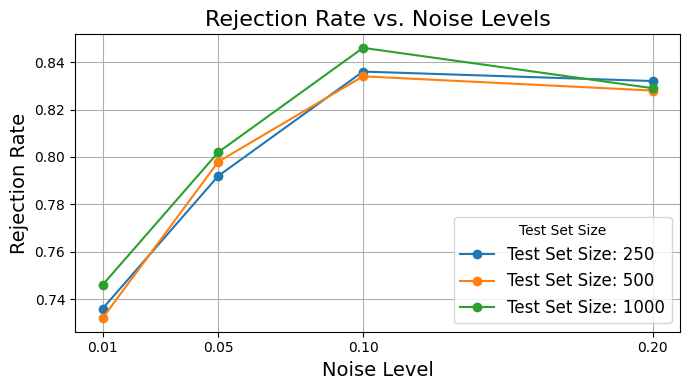

In [54]:
visualize_mmd_noisy_results(results, noise_levels, test_sizes)

The relative rejection rate seems to go up with test set size and noise level. The number of rejected samples however seems to be better than the noise free data, which might be due to the hyperparameters not being ideal.

## Task 4

<div style="color: green; font-weight:
bold">
<ul>
<li>The efficiently coded with fine illustrations.</li>
<li>No major bugs found.</li>
</ul>
</div>

In [55]:
def train_with_var_aware_mmd(summary_net, flow_model, train_loader, test_loader,
                             epochs, lr=0.001, lambda_mmd=1.0, bandwidth=1.0):
    optimizer = torch.optim.Adam(list(summary_net.parameters()) + list(flow_model.parameters()), lr=lr)

    for epoch in range(epochs):
        summary_net.train()
        flow_model.train()
        train_losses = []

        for X, Y, *params in train_loader:
            optimizer.zero_grad()

            # Generate a random variance vector (log-scale for stability)
            log_var_y = torch.randn(Y.shape[1]).clamp(min=-2, max=2)  # log-variance in range [-2, 2]
            var_y = torch.exp(log_var_y)  # Convert to variance

            features = summary_net(X)

            # Pass the combined condition (features + log_var_y) to the flow model
            combined_condition = torch.cat([features, log_var_y.unsqueeze(0).expand(X.size(0), -1)], dim=1)
            z, log_det_jacobian = flow_model(Y, combined_condition)

            nll = nll_loss(flow_model, z, log_det_jacobian)

            mmd = mmd_loss(features, torch.randn_like(features), bandwidth)

            loss = nll + lambda_mmd * mmd
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {sum(train_losses) / len(train_losses):.4f}")


In [56]:
def evaluate_with_var_aware(summary_net, flow_model, test_loader, var_settings):
    print("\nEvaluating with varying variance...")
    results = {}
    posteriors_dict = {}
    for param_name, var_values in var_settings.items():
        print(f"Evaluating for parameter: {param_name}")

        for log_var_y in var_values:
            # Ensure log_var_y is treated as a scalar value and convert to variance
            log_var_y_tensor = torch.tensor([log_var_y], dtype=torch.float32)
            var_y = torch.exp(log_var_y_tensor)  # Convert log-variance to variance
            print(f"Variance setting for {param_name}: {var_y}")

            all_features = []
            posteriors = []

            with torch.no_grad():
                for X, Y, *params in test_loader:
                    features = summary_net(X)

                    # Use condition size of hidden_dim + 3 for evaluation
                    combined_condition = torch.cat([features, log_var_y_tensor.unsqueeze(0).expand(X.size(0), -1), torch.zeros(X.size(0), 2)], dim=1)  # Adding extra dummy dimensions for consistency

                    z, log_det_jacobian = flow_model(Y, combined_condition)

                    all_features.append(features)
                    posteriors.append(z)

            all_features = torch.cat(all_features, dim=0)
            posteriors = torch.cat(posteriors, dim=0)
            posteriors_dict[(param_name, tuple(var_y.numpy()))] = posteriors
            # Perform Chi^2 test on the posterior samples
            rejected, total = chi2_test(posteriors)
            results[(param_name, tuple(var_y.numpy()))] = {"Total": total, "Rejected": rejected}

            print(f"Total: {total}, Rejected: {rejected}")

    return results, posteriors_dict, posteriors




In [57]:
variance_settings = {
    'I0': [0.01, 0.05, 0.1, 0.2],
    'lambda': [0.01, 0.05, 0.1, 0.2],
    'mu': [0.01, 0.05, 0.1, 0.2]
}

In [58]:
summary_net = SIRPredictor(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=3)
flow_model = ConditionalRealNVP(input_size=3, hidden_size=hidden_dim, blocks=num_coupling_layers, condition_size=hidden_dim+3) #new condition size
train_with_var_aware_mmd(summary_net, flow_model, train_loader, test_loader, epochs=epochs, lr=lr)
_, posteriors_dict, posteriors = evaluate_with_var_aware(summary_net, flow_model, test_loader, variance_settings)

Epoch 1/20, Train Loss: 26.1143
Epoch 2/20, Train Loss: 3.9105
Epoch 3/20, Train Loss: 3.2590
Epoch 4/20, Train Loss: 2.9899
Epoch 5/20, Train Loss: 2.7332
Epoch 6/20, Train Loss: 2.5048
Epoch 7/20, Train Loss: 2.3889
Epoch 8/20, Train Loss: 2.3754
Epoch 9/20, Train Loss: 2.1616
Epoch 10/20, Train Loss: 2.2294
Epoch 11/20, Train Loss: 2.0060
Epoch 12/20, Train Loss: 1.7557
Epoch 13/20, Train Loss: 1.6138
Epoch 14/20, Train Loss: 1.6116
Epoch 15/20, Train Loss: 1.3799
Epoch 16/20, Train Loss: 1.5413
Epoch 17/20, Train Loss: 1.1921
Epoch 18/20, Train Loss: 1.1284
Epoch 19/20, Train Loss: 1.1821
Epoch 20/20, Train Loss: 1.2833

Evaluating with varying variance...
Evaluating for parameter: I0
Variance setting for I0: tensor([1.0101])
Total: 1000, Rejected: 0
Variance setting for I0: tensor([1.0513])
Total: 1000, Rejected: 0
Variance setting for I0: tensor([1.1052])
Total: 1000, Rejected: 0
Variance setting for I0: tensor([1.2214])
Total: 1000, Rejected: 0
Evaluating for parameter: lambda
V

In [68]:
T = 100
num_samples = 5000
batch_size = 64
epochs = 20
input_dim = T * 2
hidden_dim = 64
output_dim = 6
num_coupling_layers = 4
I0_range = (5, 20)
lam_range = (0.1, 0.5)
mu_range = (0.05, 0.2)
L_range = (0, 5)
rho_range = (0.5, 1.0)
sigma2_range = (0.01, 0.1)
lr = 0.001

# Generate data
noisy_data = generate_noisy_data(num_samples, T, lam_range, mu_range, I0_range,
                                 L_range, rho_range, sigma2_range)

# Create dataset
noisy_dataset = SIRDatasetExtended(noisy_data)
train_data_noisy = SIRDatasetExtended(noisy_data[:int(0.8 * len(noisy_data))])
test_data_noisy = SIRDatasetExtended(noisy_data[int(0.8 * len(noisy_data)):])
train_loader_noisy = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader_noisy = DataLoader(test_data, batch_size=batch_size)

summary_net_noisy = SIRPredictor(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=6)
flow_model_noisy = ConditionalRealNVP(input_size=3, hidden_size=hidden_dim, blocks=num_coupling_layers, condition_size=hidden_dim+3) #new condition size
train_with_var_aware_mmd(summary_net_noisy, flow_model_noisy, train_loader_noisy, test_loader_noisy, epochs=epochs, lr=lr)
_, posteriors_noisy_dict, posteriors_noisy = evaluate_with_var_aware(summary_net_noisy, flow_model_noisy, test_loader_noisy, variance_settings)

Epoch 1/20, Train Loss: 168.9959
Epoch 2/20, Train Loss: 3.1546
Epoch 3/20, Train Loss: 2.6640
Epoch 4/20, Train Loss: 2.3978
Epoch 5/20, Train Loss: 2.2014
Epoch 6/20, Train Loss: 2.1054
Epoch 7/20, Train Loss: 1.9109
Epoch 8/20, Train Loss: 1.7029
Epoch 9/20, Train Loss: 1.6095
Epoch 10/20, Train Loss: 1.6432
Epoch 11/20, Train Loss: 1.6286
Epoch 12/20, Train Loss: 1.4629
Epoch 13/20, Train Loss: 1.2904
Epoch 14/20, Train Loss: 1.3392
Epoch 15/20, Train Loss: 1.2664
Epoch 16/20, Train Loss: 1.2352
Epoch 17/20, Train Loss: 1.1384
Epoch 18/20, Train Loss: 1.2110
Epoch 19/20, Train Loss: 1.0329
Epoch 20/20, Train Loss: 0.9951

Evaluating with varying variance...
Evaluating for parameter: I0
Variance setting for I0: tensor([1.0101])
Total: 1000, Rejected: 0
Variance setting for I0: tensor([1.0513])
Total: 1000, Rejected: 0
Variance setting for I0: tensor([1.1052])
Total: 1000, Rejected: 0
Variance setting for I0: tensor([1.2214])
Total: 1000, Rejected: 0
Evaluating for parameter: lambda


In [69]:
def plot_posterior_histograms(posteriors_dict, variance_settings):
    ncols = 3
    nparams = len(posteriors_dict)
    nrows = (nparams + ncols - 1) // ncols  # Ceiling division to determine rows

    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 3 * nrows))

    axes = axes.flatten()

    # Iterate over the dictionary and plot each histogram in a subplot
    for i, ((param_name, var_y_tuple), posterior_samples) in enumerate(posteriors_dict.items()):
        posterior_samples_np = posterior_samples.flatten().detach().numpy()

        ax = axes[i]
        ax.hist(posterior_samples_np, bins=30, alpha=0.7, label=f"Variance: {var_y_tuple}")
        ax.set_title(f"Posterior for {param_name} ({var_y_tuple})")
        ax.set_xlabel("Posterior Value")
        ax.set_ylabel("Frequency")
        ax.grid(True)
        ax.legend()

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


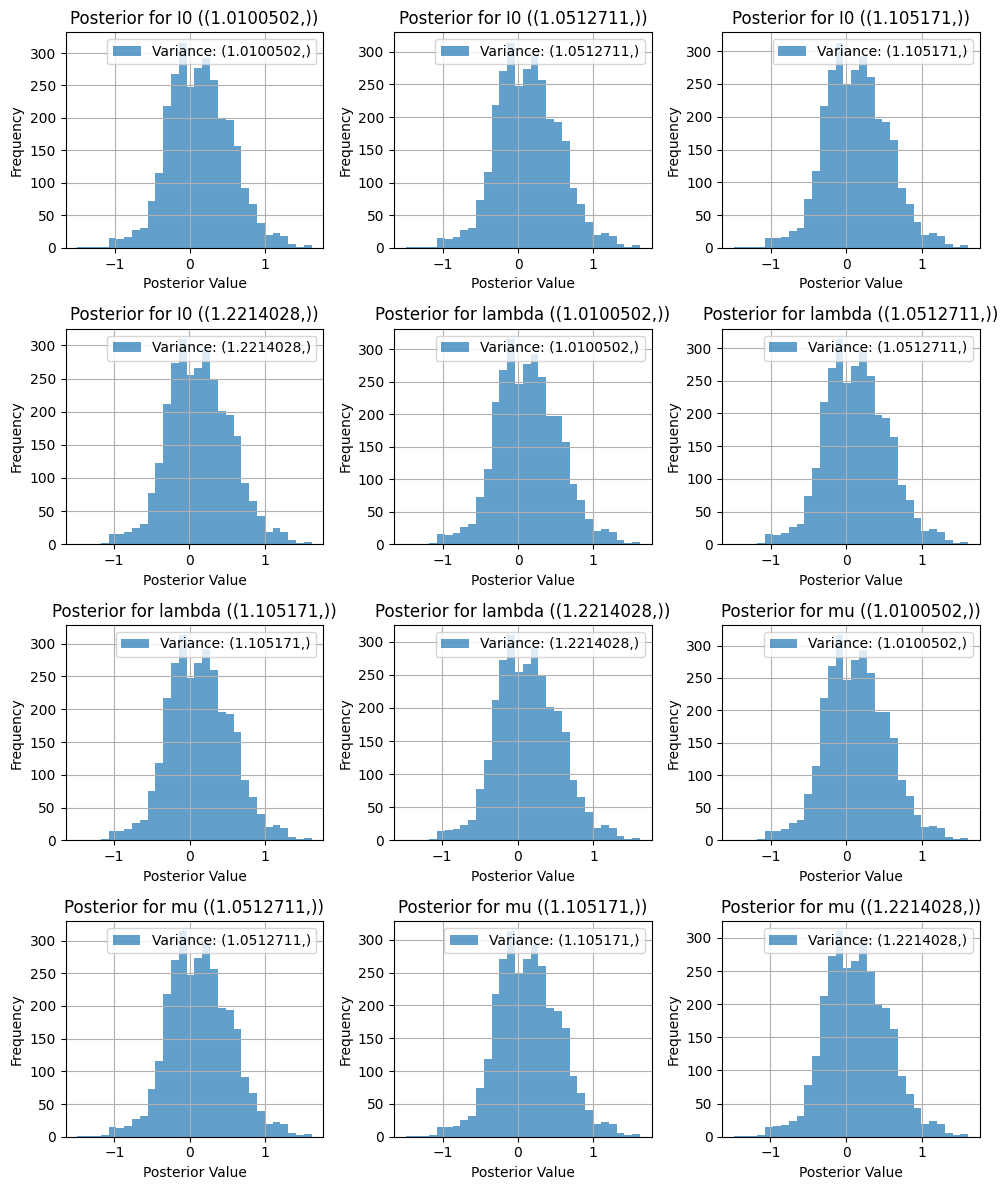

In [70]:
# noise-free models
plot_posterior_histograms(posteriors_dict, variance_settings)
#print(posteriors.values())


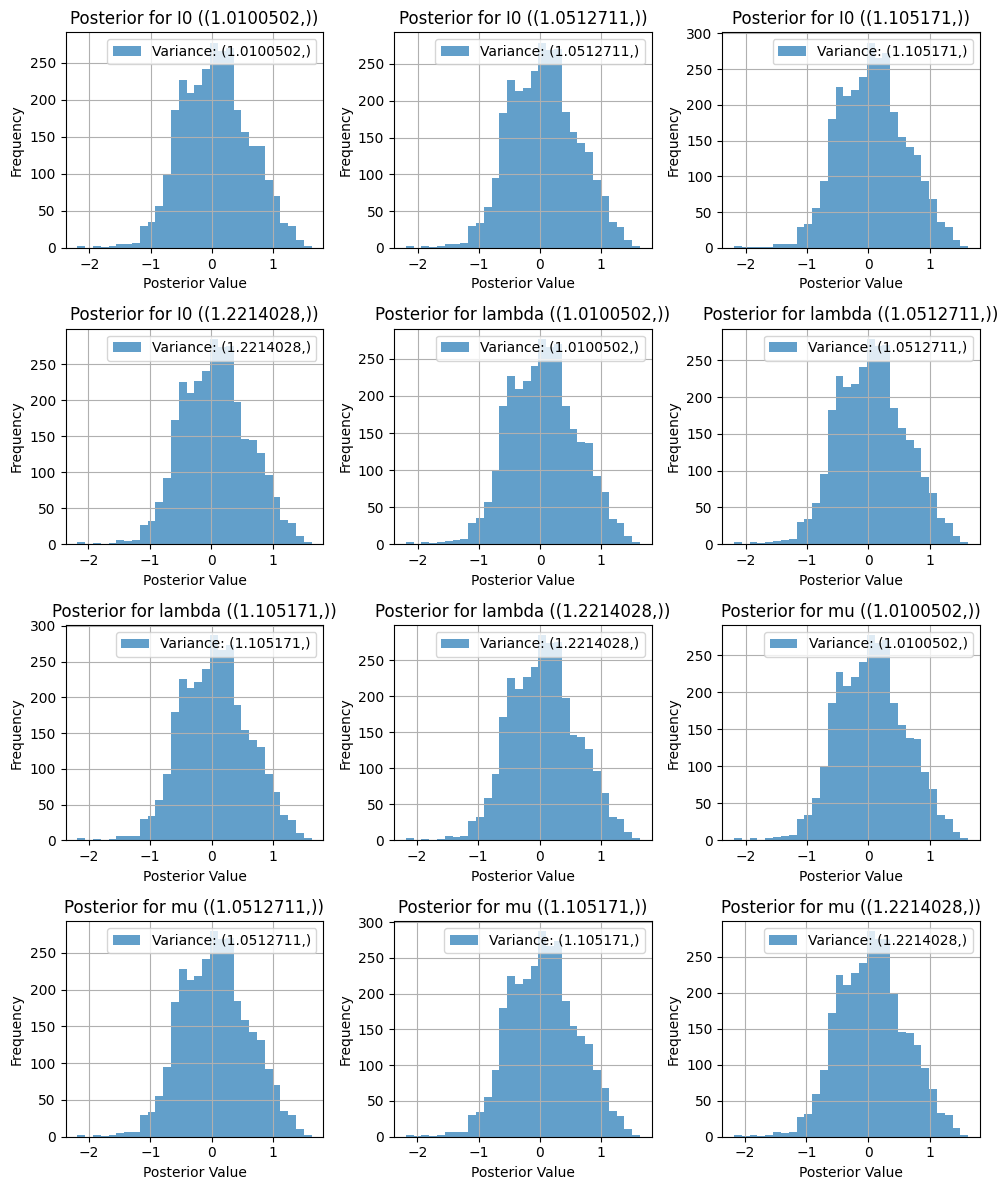

In [71]:
plot_posterior_histograms(posteriors_noisy_dict, variance_settings)

in both noise-free and noisy cases, the distributions only undergo minor changes, meaning the model isn't really sensitive with regards to the parameters.